In [1]:
import pyspark
from pyspark.sql.functions import col, to_timestamp
from pyspark.sql import SparkSession
import os
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

train_directory = "/Users/evangelosgeraridis/Desktop/MEAZON/September 2022"
test_directory = "/Users/evangelosgeraridis/Desktop/MEAZON/October 2022"

options = {
    "header": "true",
    "sep": ",",
    "multiLine": "true",
    "quote": "\"",
    "escape": "\"",
    "ignoreTrailingWhiteSpace": True
}

train_dataframes = {}
test_dataframes = {}

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Spark_RandomForestRegression_Meazon_timeperiod.com") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

import logging
spark.sparkContext.setLogLevel("ERROR")
logging.getLogger("py4j").setLevel(logging.ERROR)

# Process train data
for file in os.listdir(train_directory):
    file_path = os.path.join(train_directory, file)
    if os.path.isfile(file_path) and file.endswith(".csv"):
        df = spark.read.options(**options).csv(file_path)
        train_dataframes[file] = df

# Process test data
for file in os.listdir(test_directory):
    file_path = os.path.join(test_directory, file)
    if os.path.isfile(file_path) and file.endswith(".csv"):
        df = spark.read.options(**options).csv(file_path)
        test_dataframes[file] = df


23/06/12 20:18:36 WARN Utils: Your hostname, Evangeloss-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.2.5 instead (on interface en0)
23/06/12 20:18:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/06/12 20:18:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
train_dataframes

{'washing_machineS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'AggregatedS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'dishwasherS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'water_heaterS.csv': DataFrame[ts: string, pwrC: string, apwrC: string, curC: string, vltC: string, screC: string],
 'fridgeS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'microwaveS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'hotplateS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string]}

In [2]:
entry_counts = []

# Count entries in train DataFrames
for name, df in train_dataframes.items():
    count_value = df.count()
    entry_counts.append(count_value)
    print("Number of entries in", name, ":", count_value)

# Find the minimum count
min_count = min(entry_counts)
print("Minimum count of entries:", min_count)


Number of entries in washing_machineS.csv : 81076
Number of entries in AggregatedS.csv : 317099
Number of entries in dishwasherS.csv : 37314
Number of entries in water_heaterS.csv : 317099
Number of entries in fridgeS.csv : 79577
Number of entries in microwaveS.csv : 70790
Number of entries in hotplateS.csv : 36615
Minimum count of entries: 36615


In [3]:
entry_counts = []

# Count entries in train DataFrames
for name, df in test_dataframes.items():
    count_value = df.count()
    entry_counts.append(count_value)
    print("Number of entries in", name, ":", count_value)

# Find the minimum count
min_count = min(entry_counts)
print("Minimum count of entries:", min_count)


Number of entries in microwaveO.csv : 23901
Number of entries in hotplateO.csv : 16042
Number of entries in fridgeO.csv : 39472
Number of entries in water_heaterO.csv : 198602
Number of entries in dishwasherO.csv : 16852
Number of entries in AggregatedO.csv : 198602
Number of entries in washing_machineO.csv : 42037
Minimum count of entries: 16042


In [4]:
limited_train_dataframes = {}

# Apply the limit to each train DataFrame
for key, df in train_dataframes.items():
    limited_train_dataframes[key] = df.limit(36615)


In [5]:
limited_test_dataframes = {}

# Apply the limit to each train DataFrame
for key, df in test_dataframes.items():
    limited_test_dataframes[key] = df.limit(16042)


In [7]:
limited_train_dataframes

{'washing_machineS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'AggregatedS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'dishwasherS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'water_heaterS.csv': DataFrame[ts: string, pwrC: string, apwrC: string, curC: string, vltC: string, screC: string],
 'fridgeS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'microwaveS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'hotplateS.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string]}

In [8]:
limited_test_dataframes

{'microwaveO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'hotplateO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'fridgeO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'water_heaterO.csv': DataFrame[ts: string, pwrC: string, apwrC: string, curC: string, vltC: string, screC: string],
 'dishwasherO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'AggregatedO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string],
 'washing_machineO.csv': DataFrame[ts: string, pwrA: string, apwrA: string, curA: string, vltA: string, screA: string]}

In [6]:
washing_machine_train = limited_train_dataframes['washing_machineS.csv'].drop('ts').dropna()
aggregated_train = limited_train_dataframes['AggregatedS.csv'].drop('ts').dropna()
dishwasher_train = limited_train_dataframes['dishwasherS.csv'].drop('ts').dropna()
water_heater_train = limited_train_dataframes['water_heaterS.csv'].drop('ts').dropna()
fridge_train = limited_train_dataframes['fridgeS.csv'].drop('ts').dropna()
microwave_train = limited_train_dataframes['microwaveS.csv'].drop('ts').dropna()
hotplate_train = limited_train_dataframes['hotplateS.csv'].drop('ts').dropna()

In [7]:
washing_machine_test = limited_test_dataframes['washing_machineO.csv'].drop('ts').dropna()
aggregated_test = limited_test_dataframes['AggregatedO.csv'].drop('ts').dropna()
dishwasher_test = limited_test_dataframes['dishwasherO.csv'].drop('ts').dropna()
water_heater_test = limited_test_dataframes['water_heaterO.csv'].drop('ts').dropna()
fridge_test = limited_test_dataframes['fridgeO.csv'].drop('ts').dropna()
microwave_test = limited_test_dataframes['microwaveO.csv'].drop('ts').dropna()
hotplate_test = limited_test_dataframes['hotplateO.csv'].drop('ts').dropna()

In [8]:
hotplate_train

DataFrame[pwrA: string, apwrA: string, curA: string, vltA: string, screA: string]

In [8]:
dataframes = [fridge_train,fridge_test,dishwasher_train,dishwasher_test,hotplate_train,hotplate_test,microwave_train,microwave_test,
            washing_machine_train,washing_machine_test ,water_heater_train,water_heater_test,aggregated_train,aggregated_test]

modified_dataframes = []
for df in dataframes:
    for column in df.columns:
        df = df.withColumn(column, col(column).cast(DoubleType()))

    # Append the modified dataframe to the new list
    modified_dataframes.append(df)

# Assign the modified dataframes back to individual variables
fridge_train,fridge_test,dishwasher_train,dishwasher_test,hotplate_train,hotplate_test,microwave_train,microwave_test, washing_machine_train,washing_machine_test ,water_heater_train,water_heater_test,aggregated_train,aggregated_test= modified_dataframes

for df in modified_dataframes:
    df = df.dropna()
    df.show(20)
    df.printSchema()
    print(df.count())


+-------+-------+-----+-------+-----+
|   pwrA|  apwrA| curA|   vltA|screA|
+-------+-------+-----+-------+-----+
|126.163| 200.32|0.912|220.036|0.754|
|126.112|  200.1|0.913|219.542|0.753|
|126.236|199.859|0.911|219.856| 0.76|
|126.321|200.896|0.915|220.039|0.755|
|126.341|202.959|0.922| 220.45|0.786|
|126.231| 201.28|0.911| 221.45|0.773|
| 25.111| 42.974|0.196|220.772|0.258|
| 16.665| 20.602|0.094|220.762|  0.9|
| 15.262| 15.951|0.072|220.778|0.668|
| 14.963| 15.163|0.069|220.781|1.007|
| 14.964| 15.111|0.069|220.793|0.701|
| 14.955| 15.118|0.069|220.797|0.695|
|   14.8| 14.888|0.068|220.739|0.702|
| 14.789| 14.872|0.068|220.745|0.708|
| 14.626| 14.723|0.067|220.739|0.707|
| 14.756| 14.904|0.068|220.732|0.699|
| 14.623|   14.7|0.067|220.711|0.708|
| 14.617| 14.755|0.067|220.667|0.714|
| 14.669| 14.908|0.068|220.602|0.912|
| 14.846|  15.04|0.068|220.643| 0.69|
+-------+-------+-----+-------+-----+
only showing top 20 rows

root
 |-- pwrA: double (nullable = true)
 |-- apwrA: double (n

In [9]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the fridge device
input_cols_fridge = aggregated_train.columns
output_cols_fridge = fridge_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_fridge, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_fridge:
    # Create a new rf model with the corresponding label column
    rf = RandomForestRegressor(featuresCol='scaled_features', labelCol=output_col, numTrees=220,maxDepth=25 )
    
    # Update the stages of the pipeline with the new rf model
    pipeline.setStages([assembler, scaler, rf])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on fridge_test dataset
    predictions = pipeline_model.transform(fridge_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 36.598043259014204
MSE: 1339.416770388675
MAE: 19.76293649025621
R2: 0.9839602275318351



Metrics for apwrA:
RMSE: 64.80147084882444
MSE: 4199.230624171043
MAE: 43.65701010246814
R2: 0.9599859585062523



Metrics for curA:
RMSE: 0.2930231151477464
MSE: 0.08586254601088947
MAE: 0.19739305008622132
R2: 0.9600772724286913



Metrics for vltA:
RMSE: 0.590238767936311
MSE: 0.3483818031749744
MAE: 0.34756442630135864
R2: 0.9204284346747817



Metrics for screA:
RMSE: 0.39132261521055794
MSE: 0.1531333891752304
MAE: 0.37619863188748315
R2: -8.039206659102232



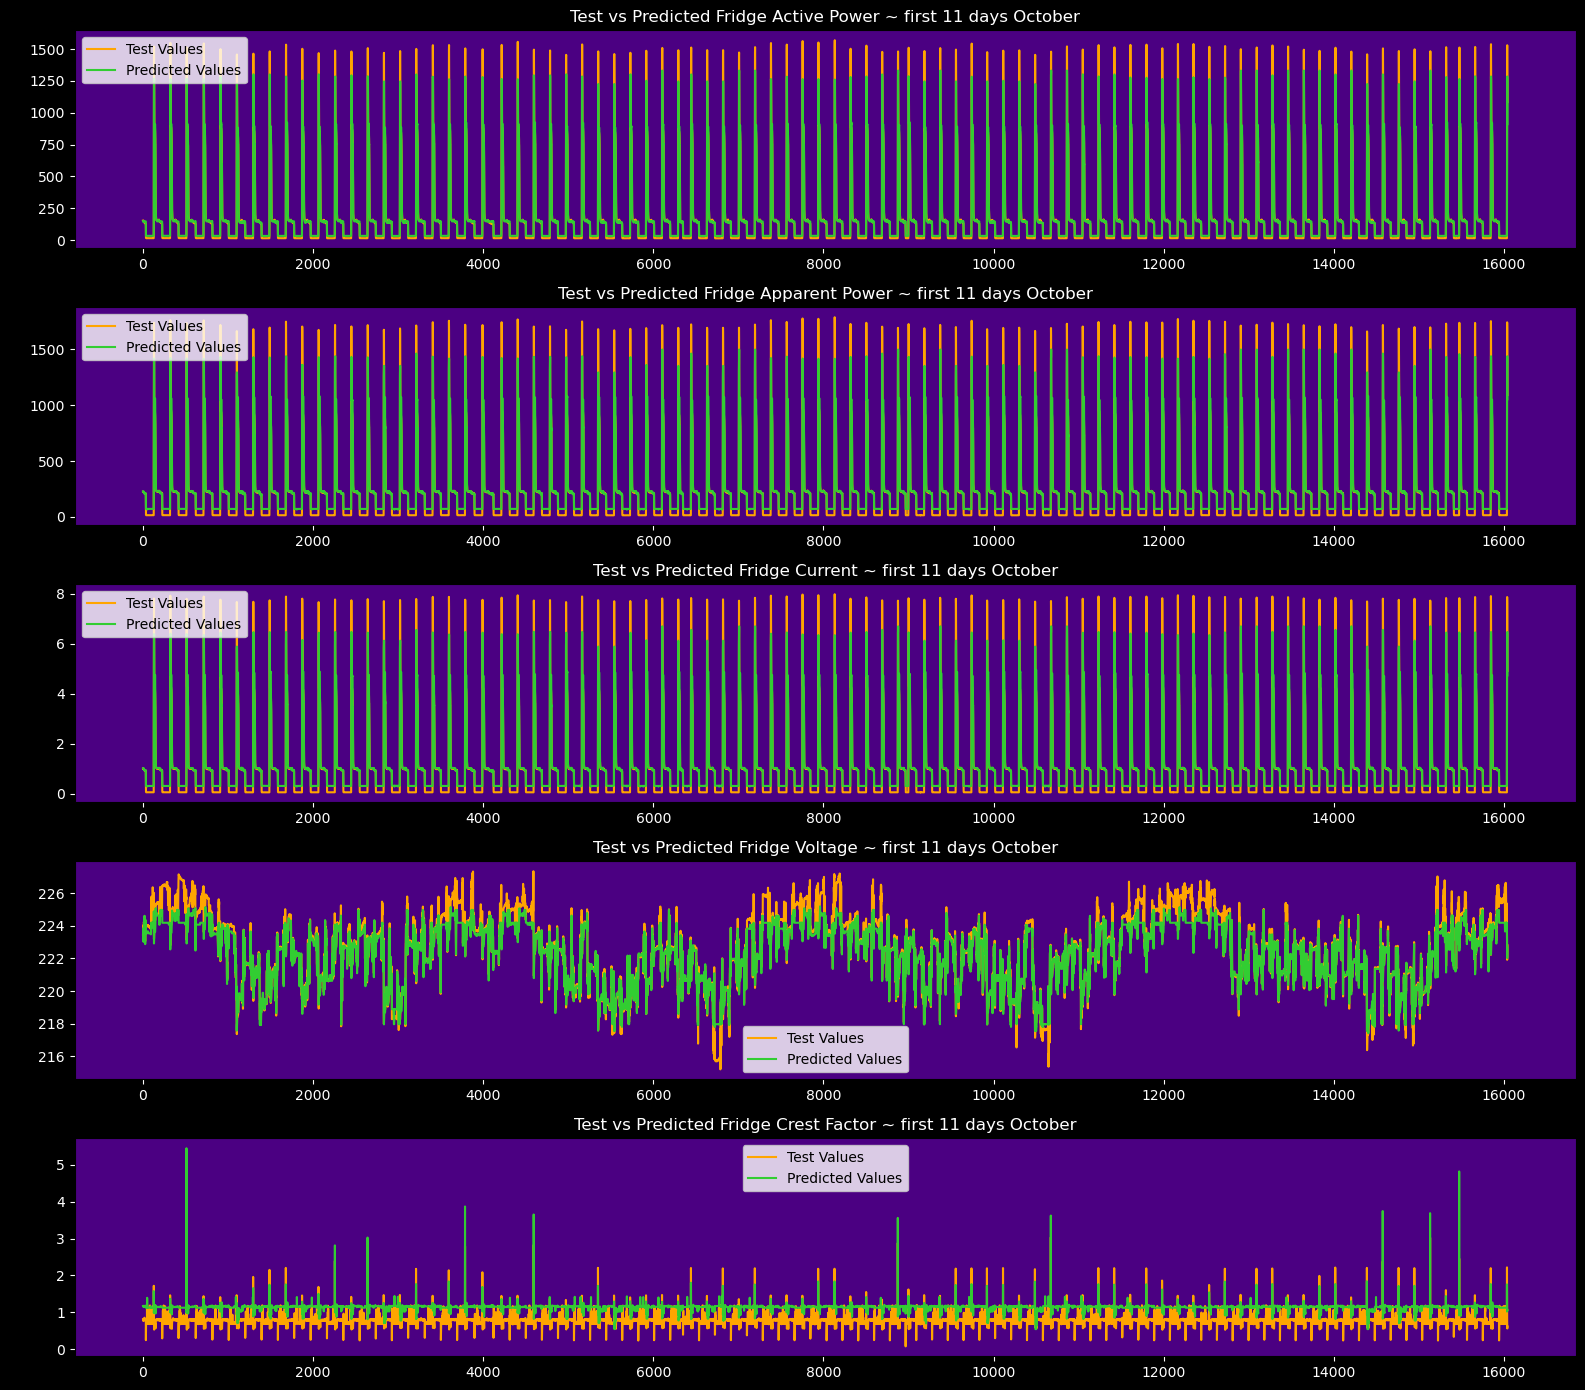

In [13]:

import matplotlib.pyplot as plt


predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Fridge Active Power ~ first 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Fridge Apparent Power ~ first 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Fridge Current ~ first 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Fridge Voltage ~ first 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Fridge Crest Factor ~ first 11 days October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


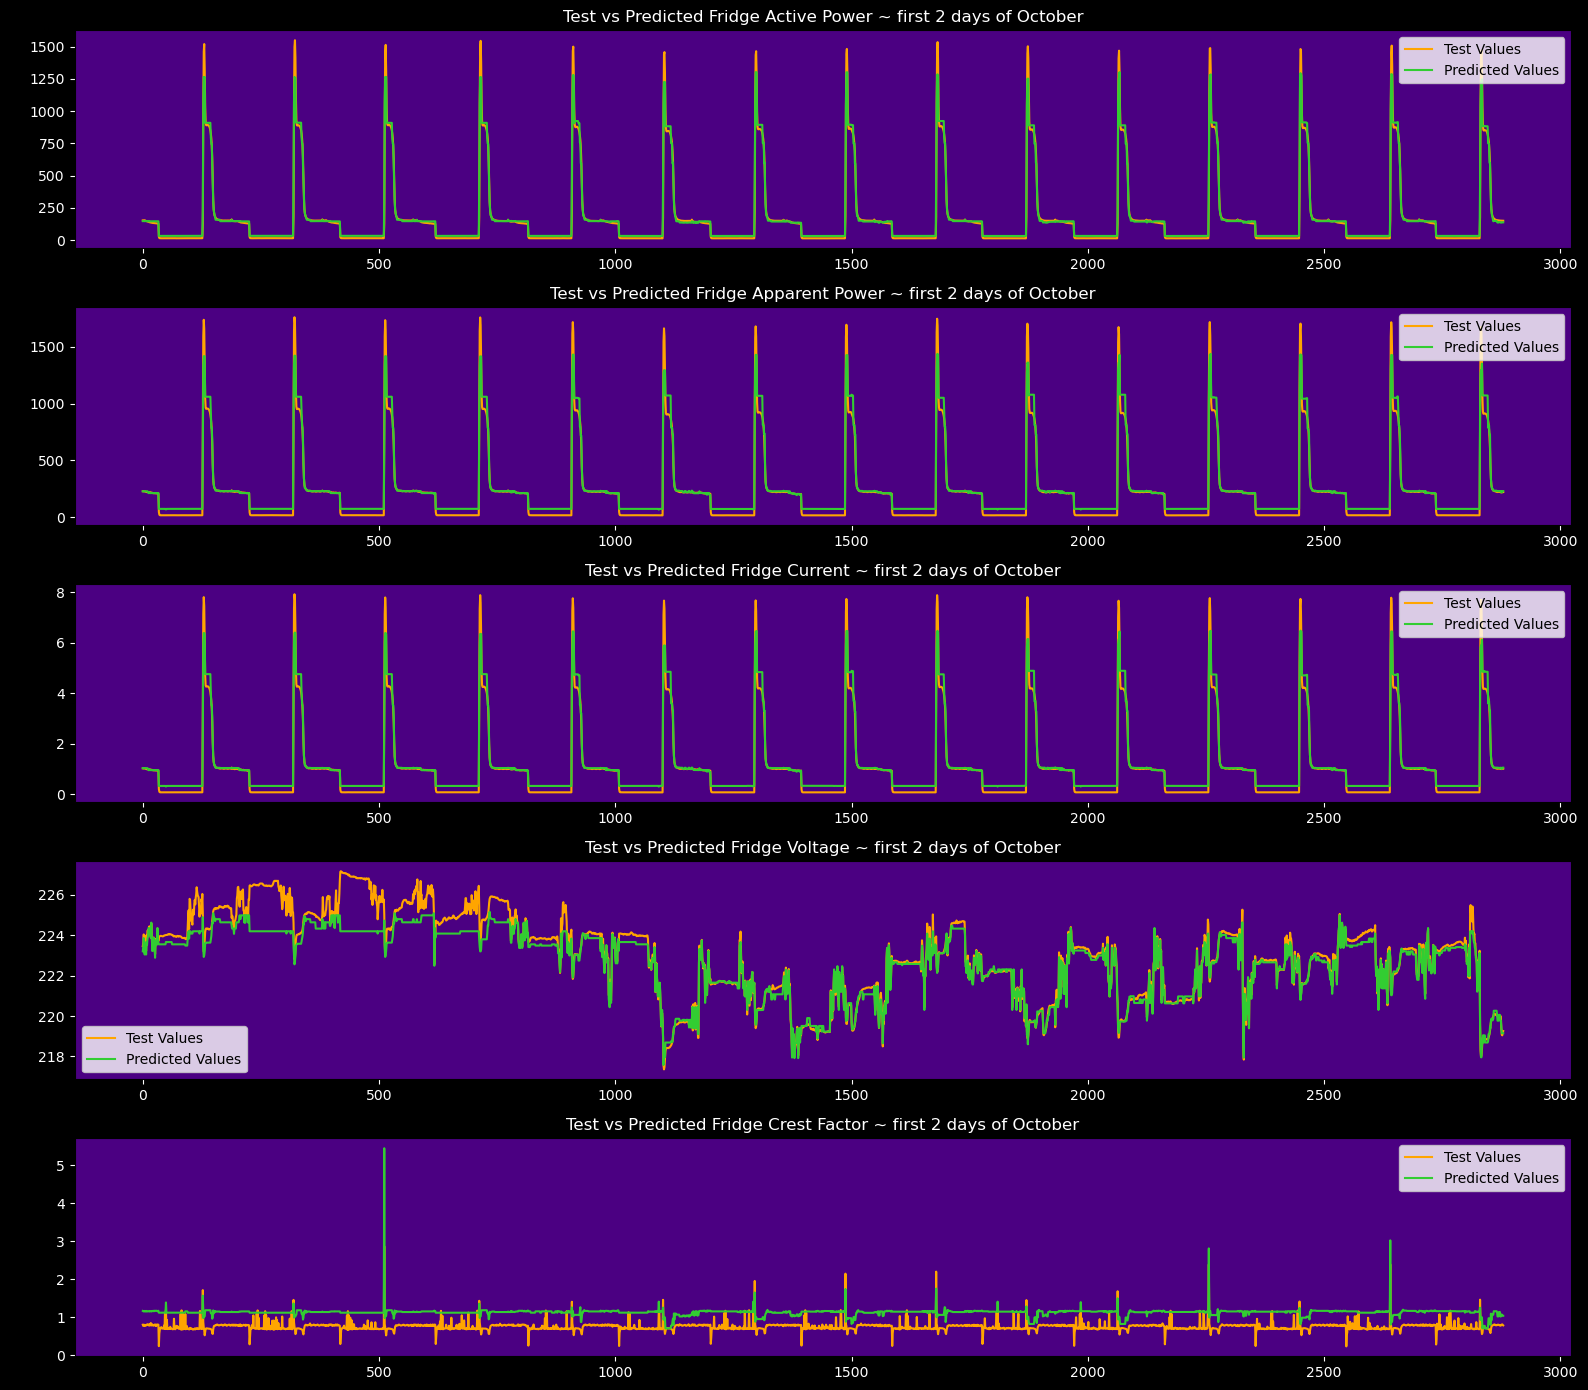

In [17]:
# now let us isolate the first two days of october from the test fridge to have a closer look. If 1 sample is approximately
# taken every minute, here we would need about 2880 entries





fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Fridge Active Power ~ first 2 days of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Fridge Apparent Power ~ first 2 days of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Fridge Current ~ first 2 days of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Fridge Voltage ~ first 2 days of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880] ,label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Fridge Crest Factor ~ first 2 days of October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


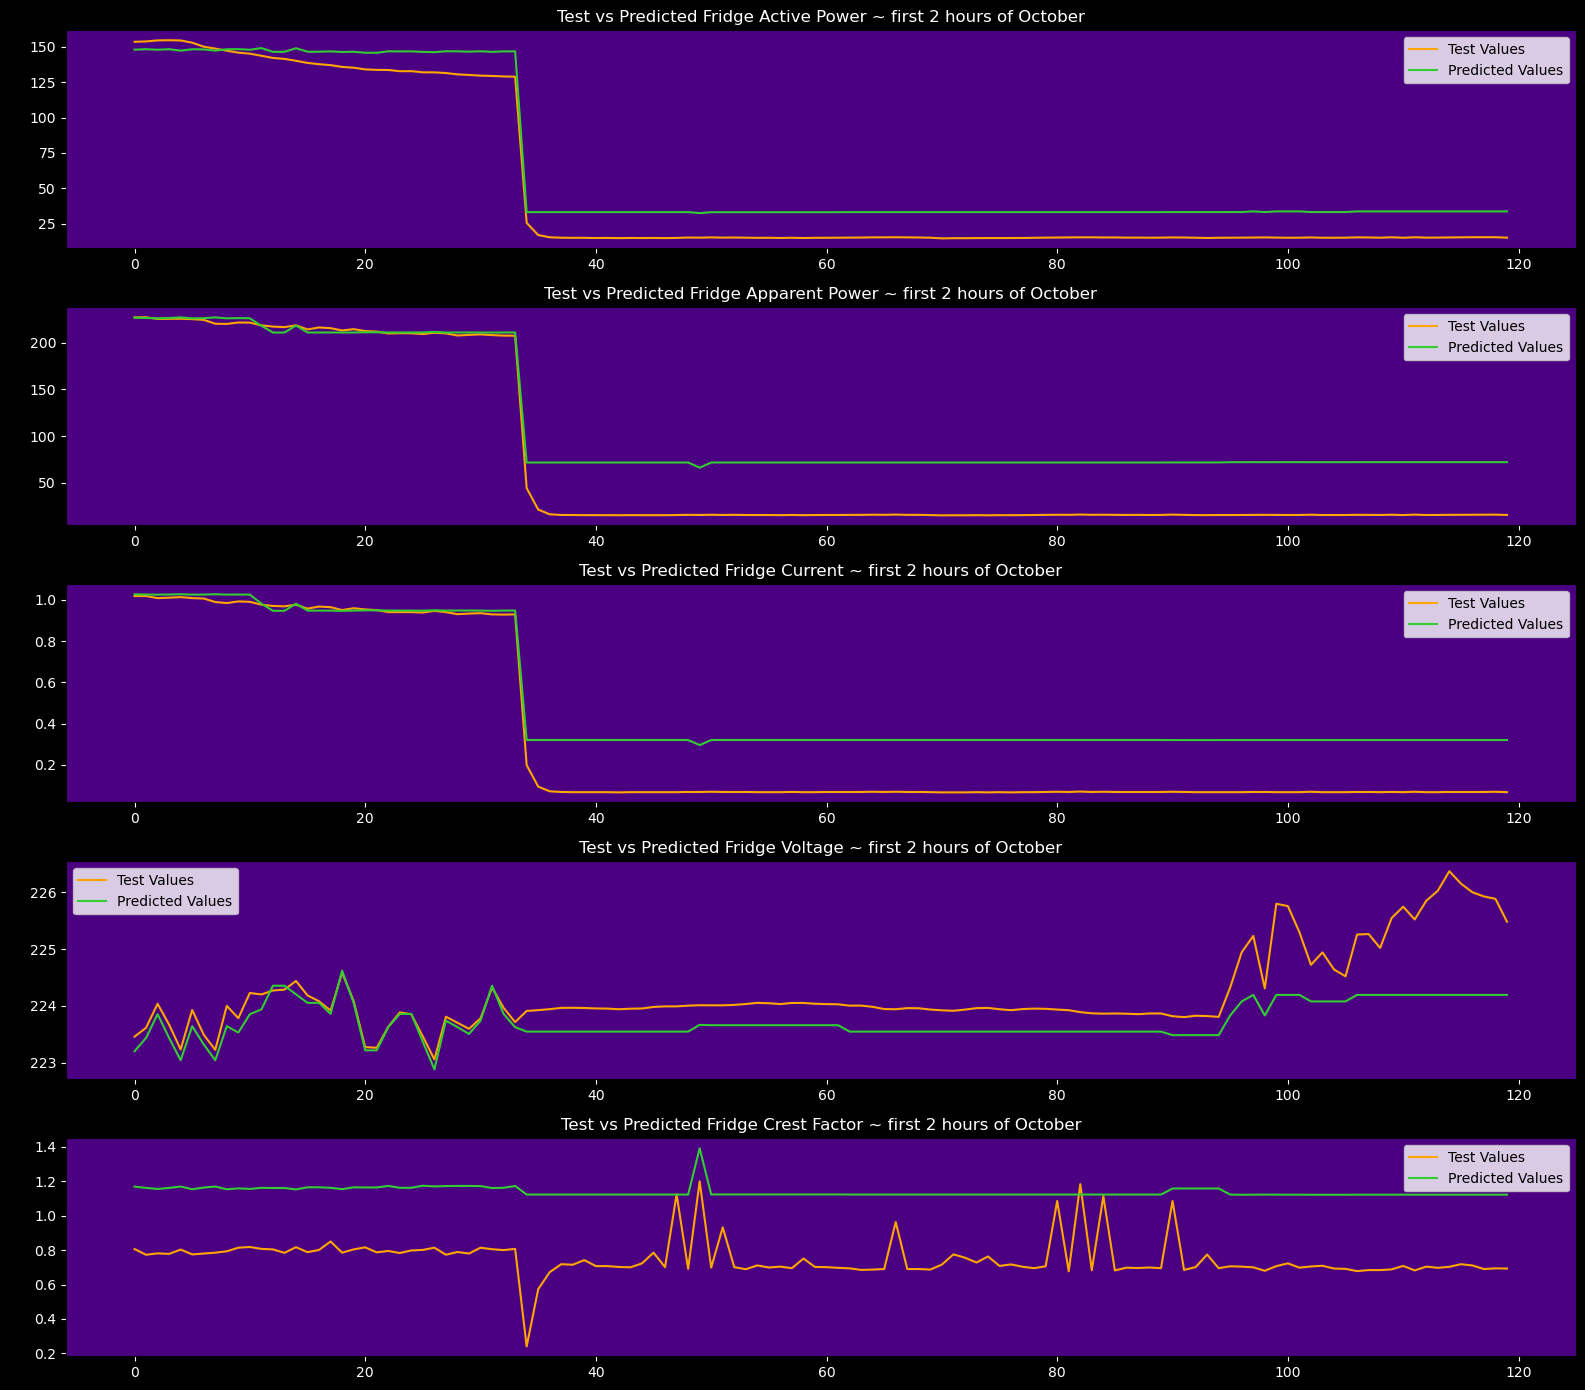

In [16]:
# and let us see for the first two hours 120 entries approximately
# now let us isolate the first two days of october from the test fridge to have a closer look. If 1 sample is approximately
# taken every minute, here we would need about 120 entries





fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:120], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:120], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Fridge Active Power ~ first 2 hours of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:120], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:120], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Fridge Apparent Power ~ first 2 hours of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:120], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:120], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Fridge Current ~ first 2 hours of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:120], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:120], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Fridge Voltage ~ first 2 hours of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:120] ,label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:120], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Fridge Crest Factor ~ first 2 hours of October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [31]:
# we will reduce a bit the number of trees in order not to strain to much our machine

### WHASGING MACHINE

from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the washing_machine device
input_cols_washing_machine = aggregated_train.columns
output_cols_washing_machine = washing_machine_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_washing_machine, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_washing_machine:
    # Create a new rf model with the corresponding label column
    rf = RandomForestRegressor(featuresCol='scaled_features', labelCol=output_col, numTrees= 60,maxDepth=25 )
    
    # Update the stages of the pipeline with the new rf model
    pipeline.setStages([assembler, scaler, rf])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on washing_machine_test dataset
    predictions = pipeline_model.transform(washing_machine_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 603.6145482892438
MSE: 364350.52290642774
MAE: 263.572226540889
R2: 0.3259724925295566



Metrics for apwrA:
RMSE: 688.5403880680017
MSE: 474087.86600083427
MAE: 312.50152307344825
R2: 0.12348993553108667



Metrics for curA:
RMSE: 3.1215249504725073
MSE: 9.74391801642239
MAE: 1.416987851520628
R2: 0.1405009929199752



Metrics for vltA:
RMSE: 0.6080323023296571
MSE: 0.36970328067630354
MAE: 0.35551840343573515
R2: 0.9229055503802824



Metrics for screA:
RMSE: 0.24835110791199622
MSE: 0.06167827280111599
MAE: 0.18654235634534272
R2: 0.4810546160185709



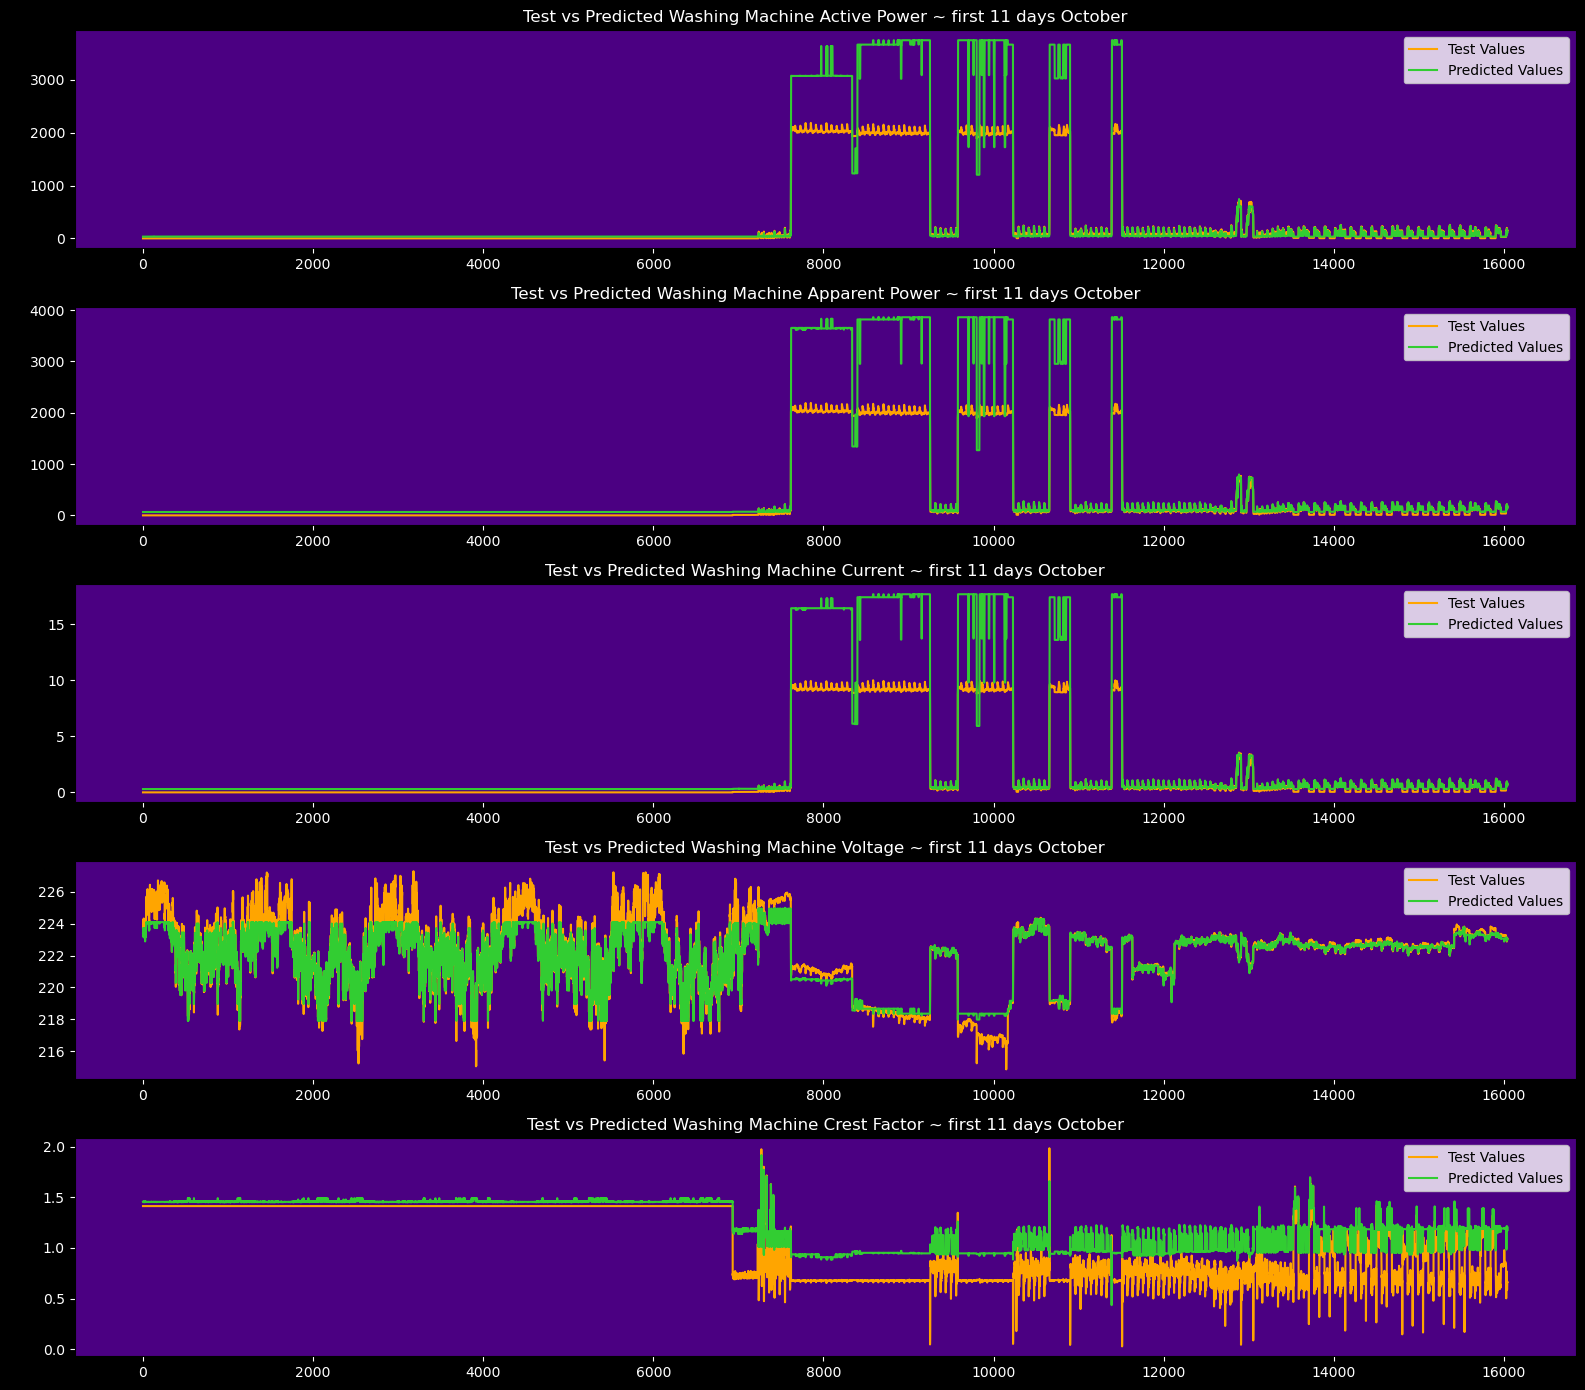

In [32]:

import matplotlib.pyplot as plt


predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Washing Machine Active Power ~ first 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Washing Machine Apparent Power ~ first 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Washing Machine Current ~ first 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Washing Machine Voltage ~ first 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Washing Machine Crest Factor ~ first 11 days October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


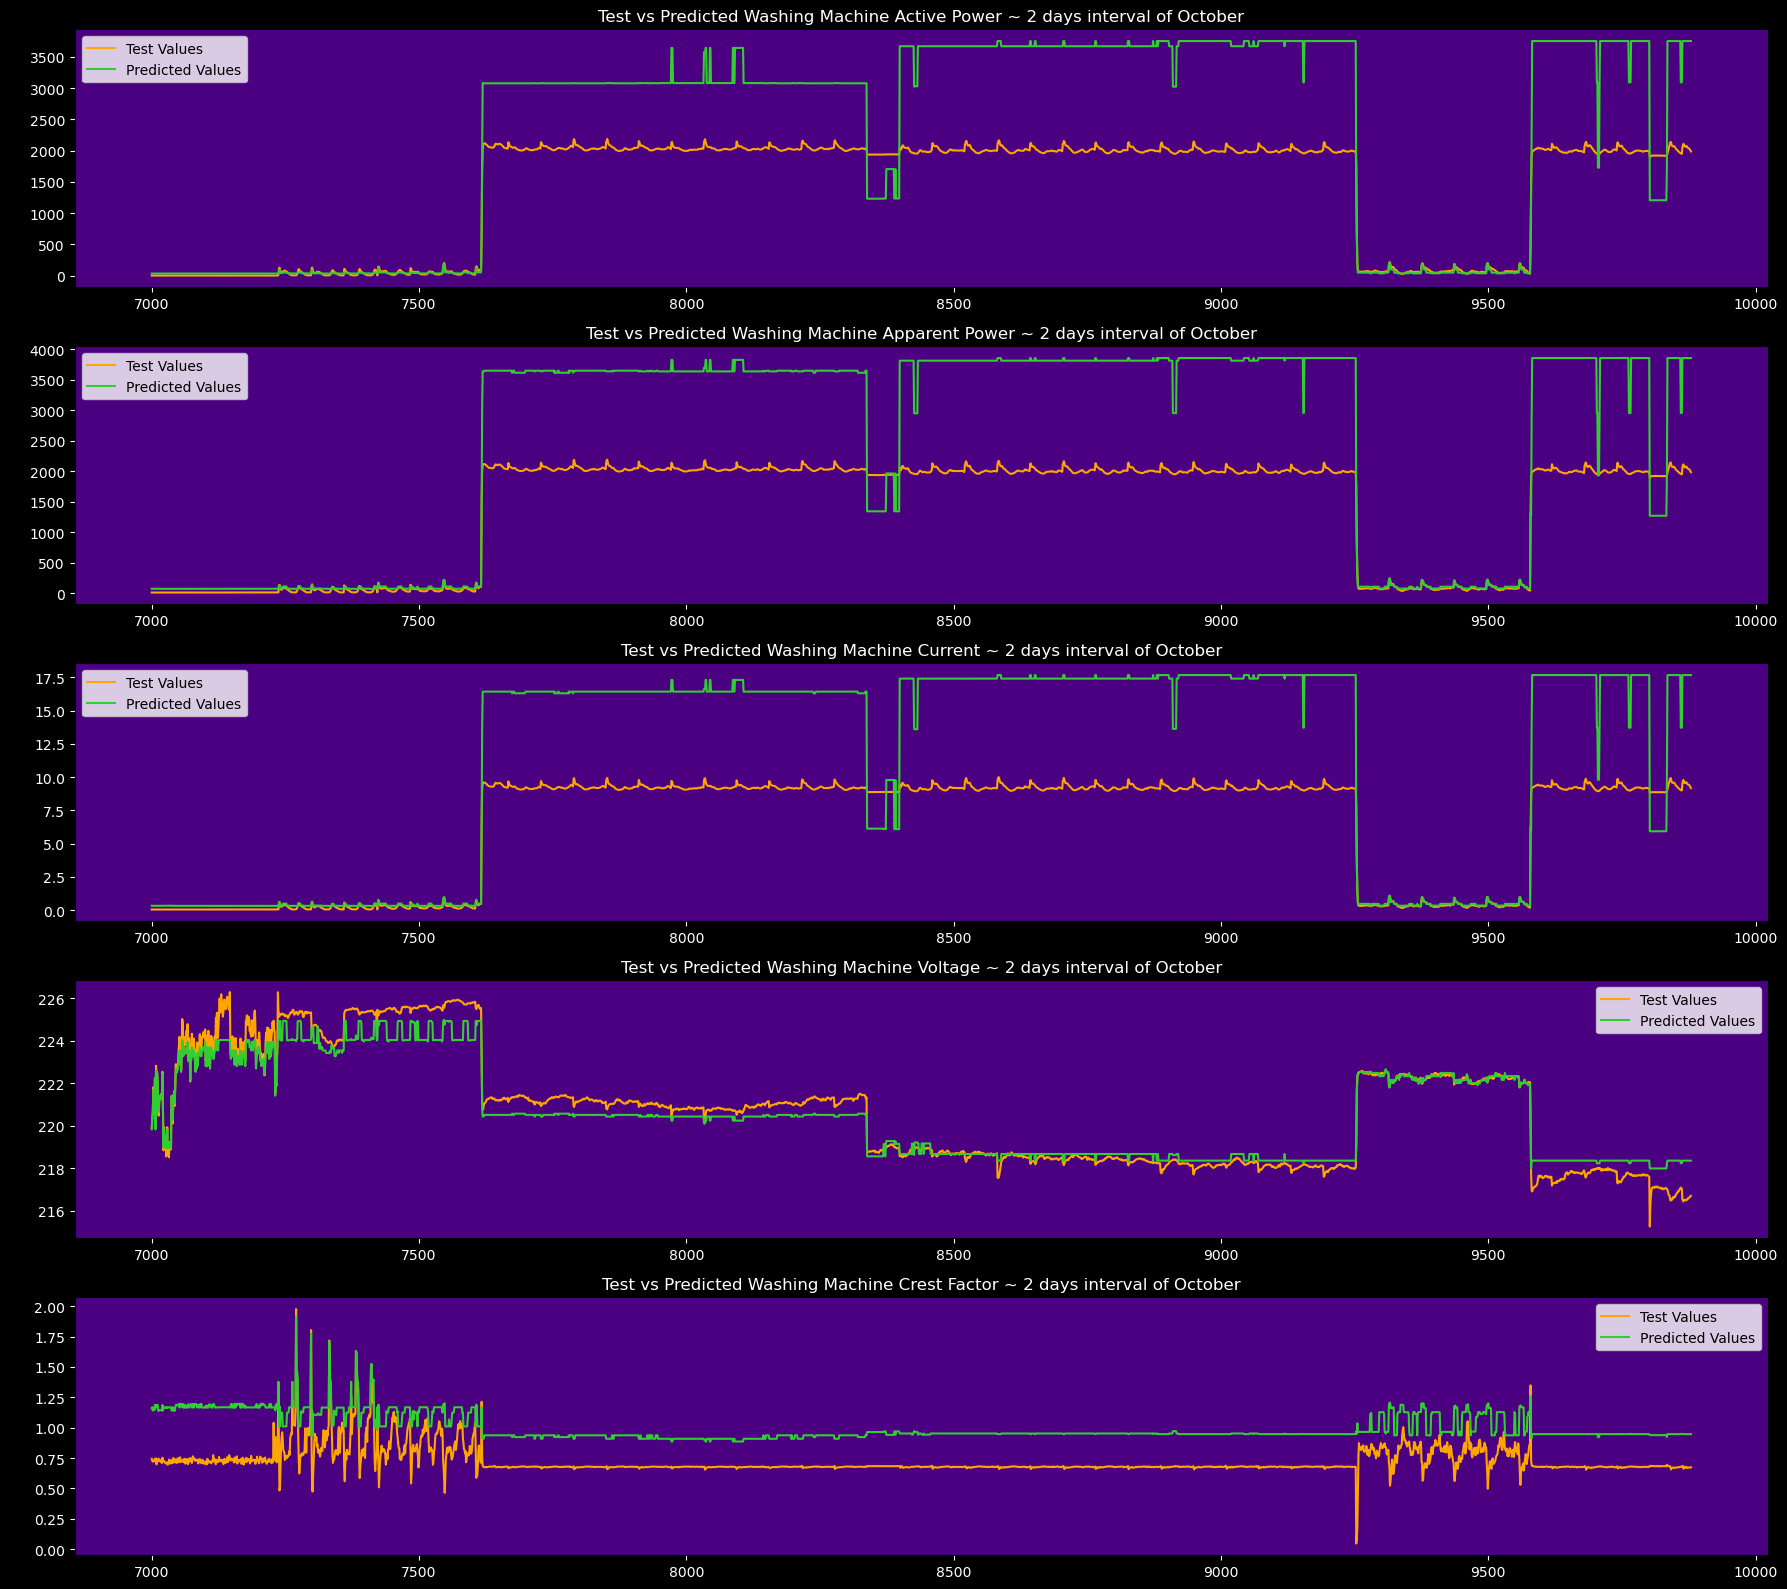

In [33]:
# since the first ~ 2 days (0:2880 in data points), the active power of washing machine is zero, probably
# did not function , we will move to a more interesting region again in range of ~2 days 2880 data points from
# 7000 let's say to 9880




fig, axs = plt.subplots(5, 1, figsize=(18, 16))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[7000:9880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[7000:9880], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Washing Machine Active Power ~ 2 days interval of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[7000:9880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[7000:9880], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Washing Machine Apparent Power ~ 2 days interval of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[7000:9880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[7000:9880], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Washing Machine Current ~ 2 days interval of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[7000:9880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[7000:9880], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Washing Machine Voltage ~ 2 days interval of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[7000:9880] ,label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[7000:9880], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Washing Machine Crest Factor ~ 2 days interval of October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


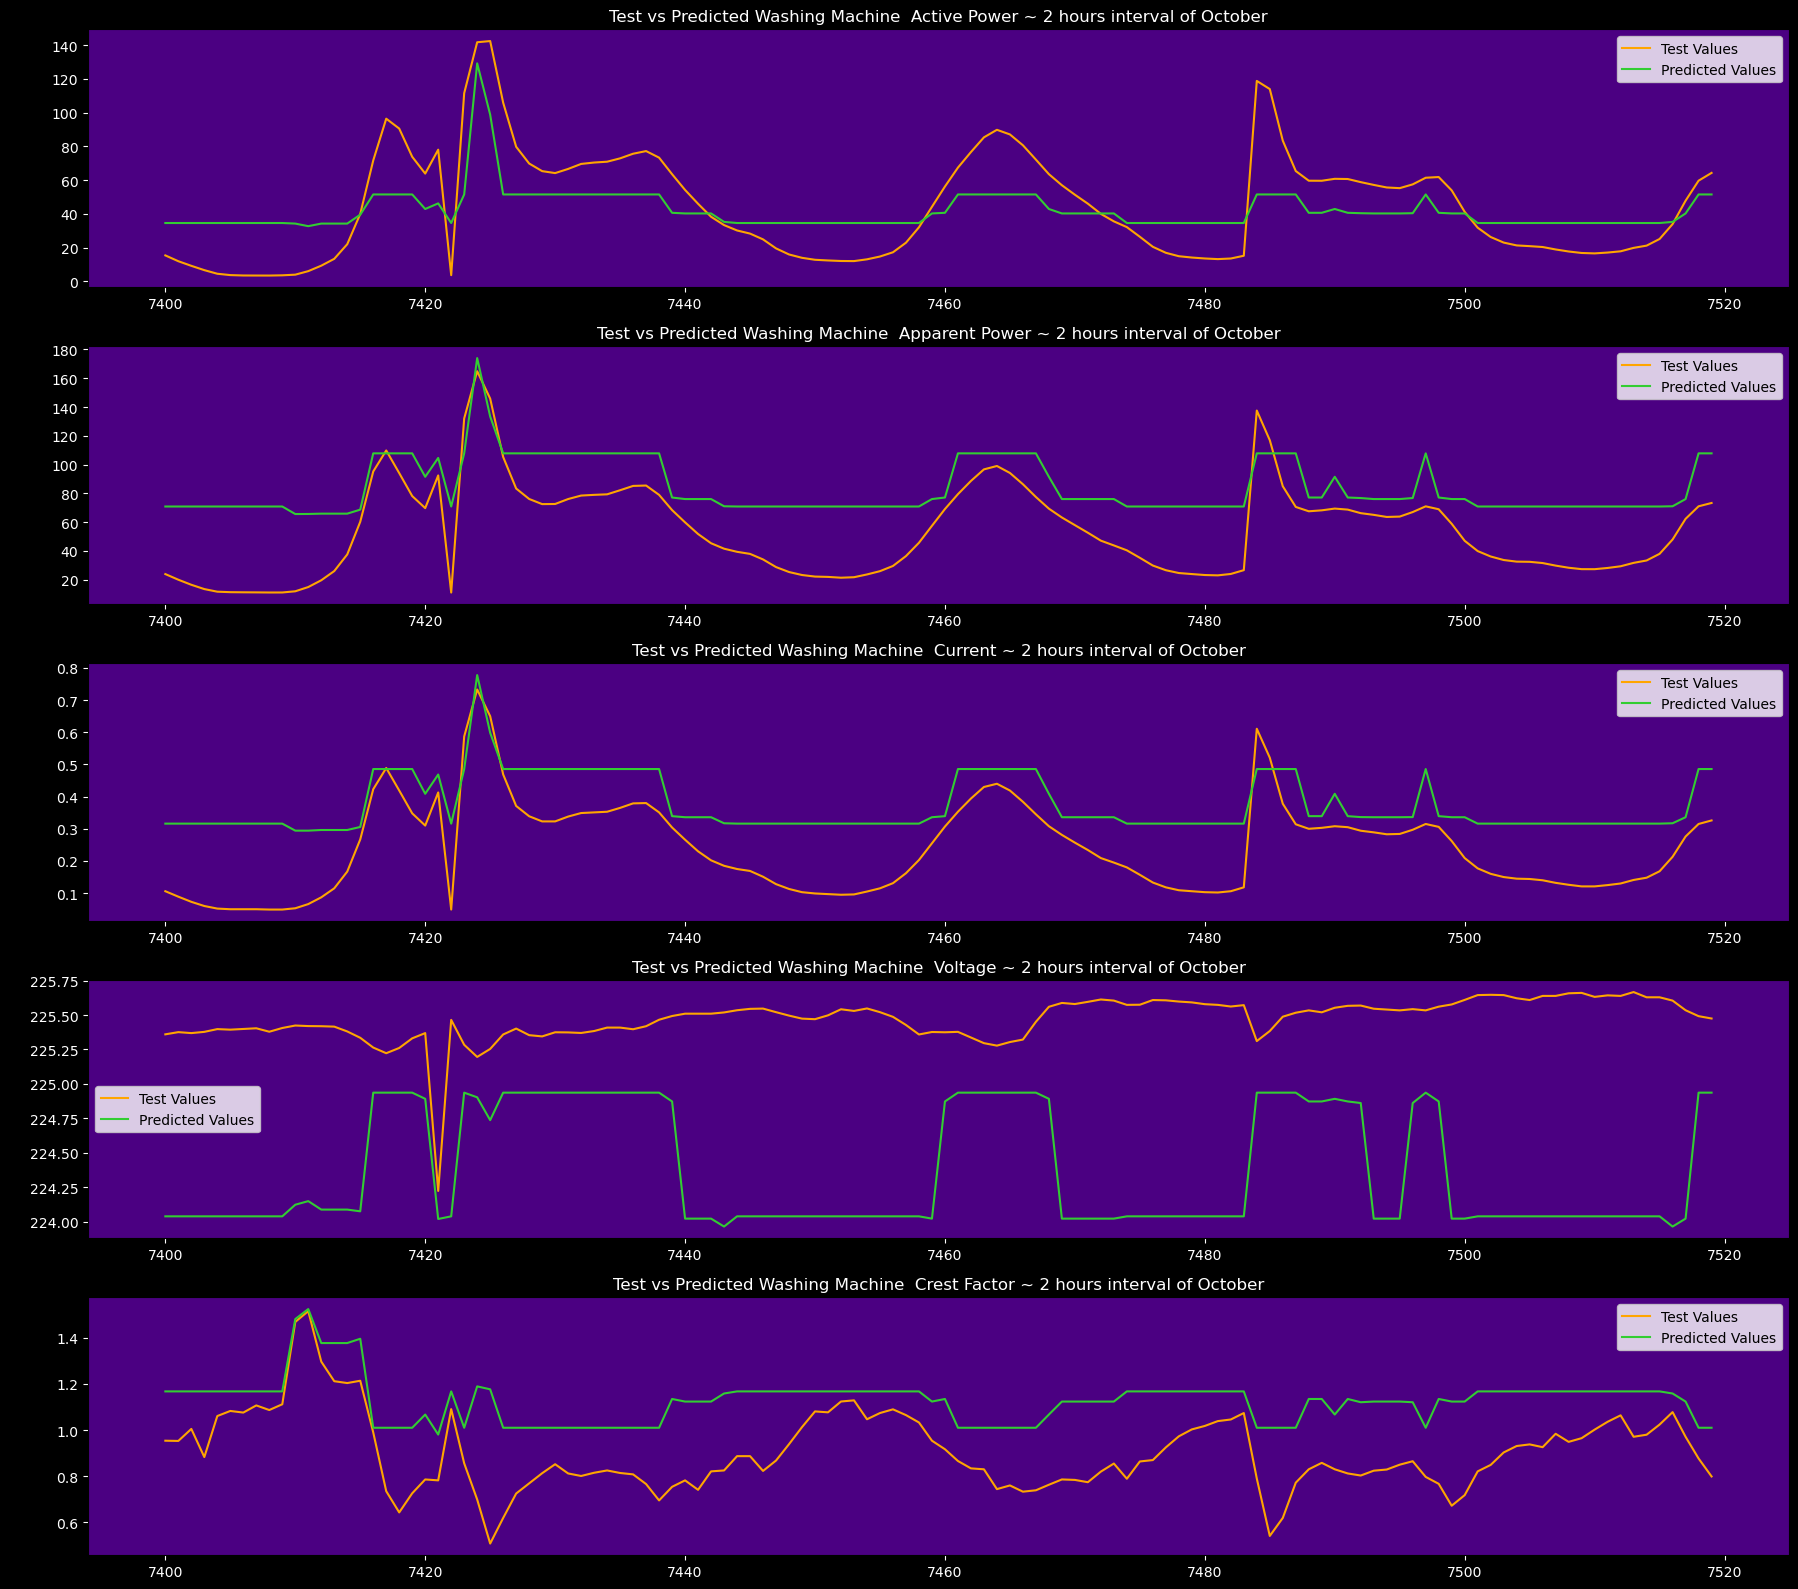

In [34]:
# let's isolate now a 2 hour interval especially on low but non zero active power actual values, on
# 7400 to 7520

fig, axs = plt.subplots(5, 1, figsize=(18, 16))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[7400:7520], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[7400:7520], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Washing Machine  Active Power ~ 2 hours interval of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[7400:7520], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[7400:7520], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Washing Machine  Apparent Power ~ 2 hours interval of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[7400:7520], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[7400:7520], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Washing Machine  Current ~ 2 hours interval of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[7400:7520], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[7400:7520], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Washing Machine  Voltage ~ 2 hours interval of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[7400:7520] ,label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[7400:7520], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Washing Machine  Crest Factor ~ 2 hours interval of October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [27]:
# pretty close not as good as the grated boosted trees though from evaluation metrics. Also Linear Regression had regularized
# parameters and this plays a part on the greater results.


### MICROWAVE

from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the microwave device
input_cols_microwave = aggregated_train.columns
output_cols_microwave = microwave_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_microwave, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_microwave:
    # Create a new rf model with the corresponding label column
    rf = RandomForestRegressor(featuresCol='scaled_features', labelCol=output_col, numTrees= 60,maxDepth=25 )
    
    # Update the stages of the pipeline with the new rf model
    pipeline.setStages([assembler, scaler, rf])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on microwave_test dataset
    predictions = pipeline_model.transform(microwave_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 70.57890960633507
MSE: 4981.382481219218
MAE: 42.84624728653035
R2: 0.9581484583205674



Metrics for apwrA:
RMSE: 74.24013280375945
MSE: 5511.597318719841
MAE: 61.43687609090096
R2: 0.9666992069290207



Metrics for curA:
RMSE: 0.3330612788234633
MSE: 0.11092981545152078
MAE: 0.274473524764817
R2: 0.967017087534404



Metrics for vltA:
RMSE: 0.9970244236388871
MSE: 0.9940577013324551
MAE: 0.671996791714896
R2: 0.8237771784719821



Metrics for screA:
RMSE: 0.41470565342896903
MSE: 0.17198077898594816
MAE: 0.38313475474211695
R2: -5.097983436571717



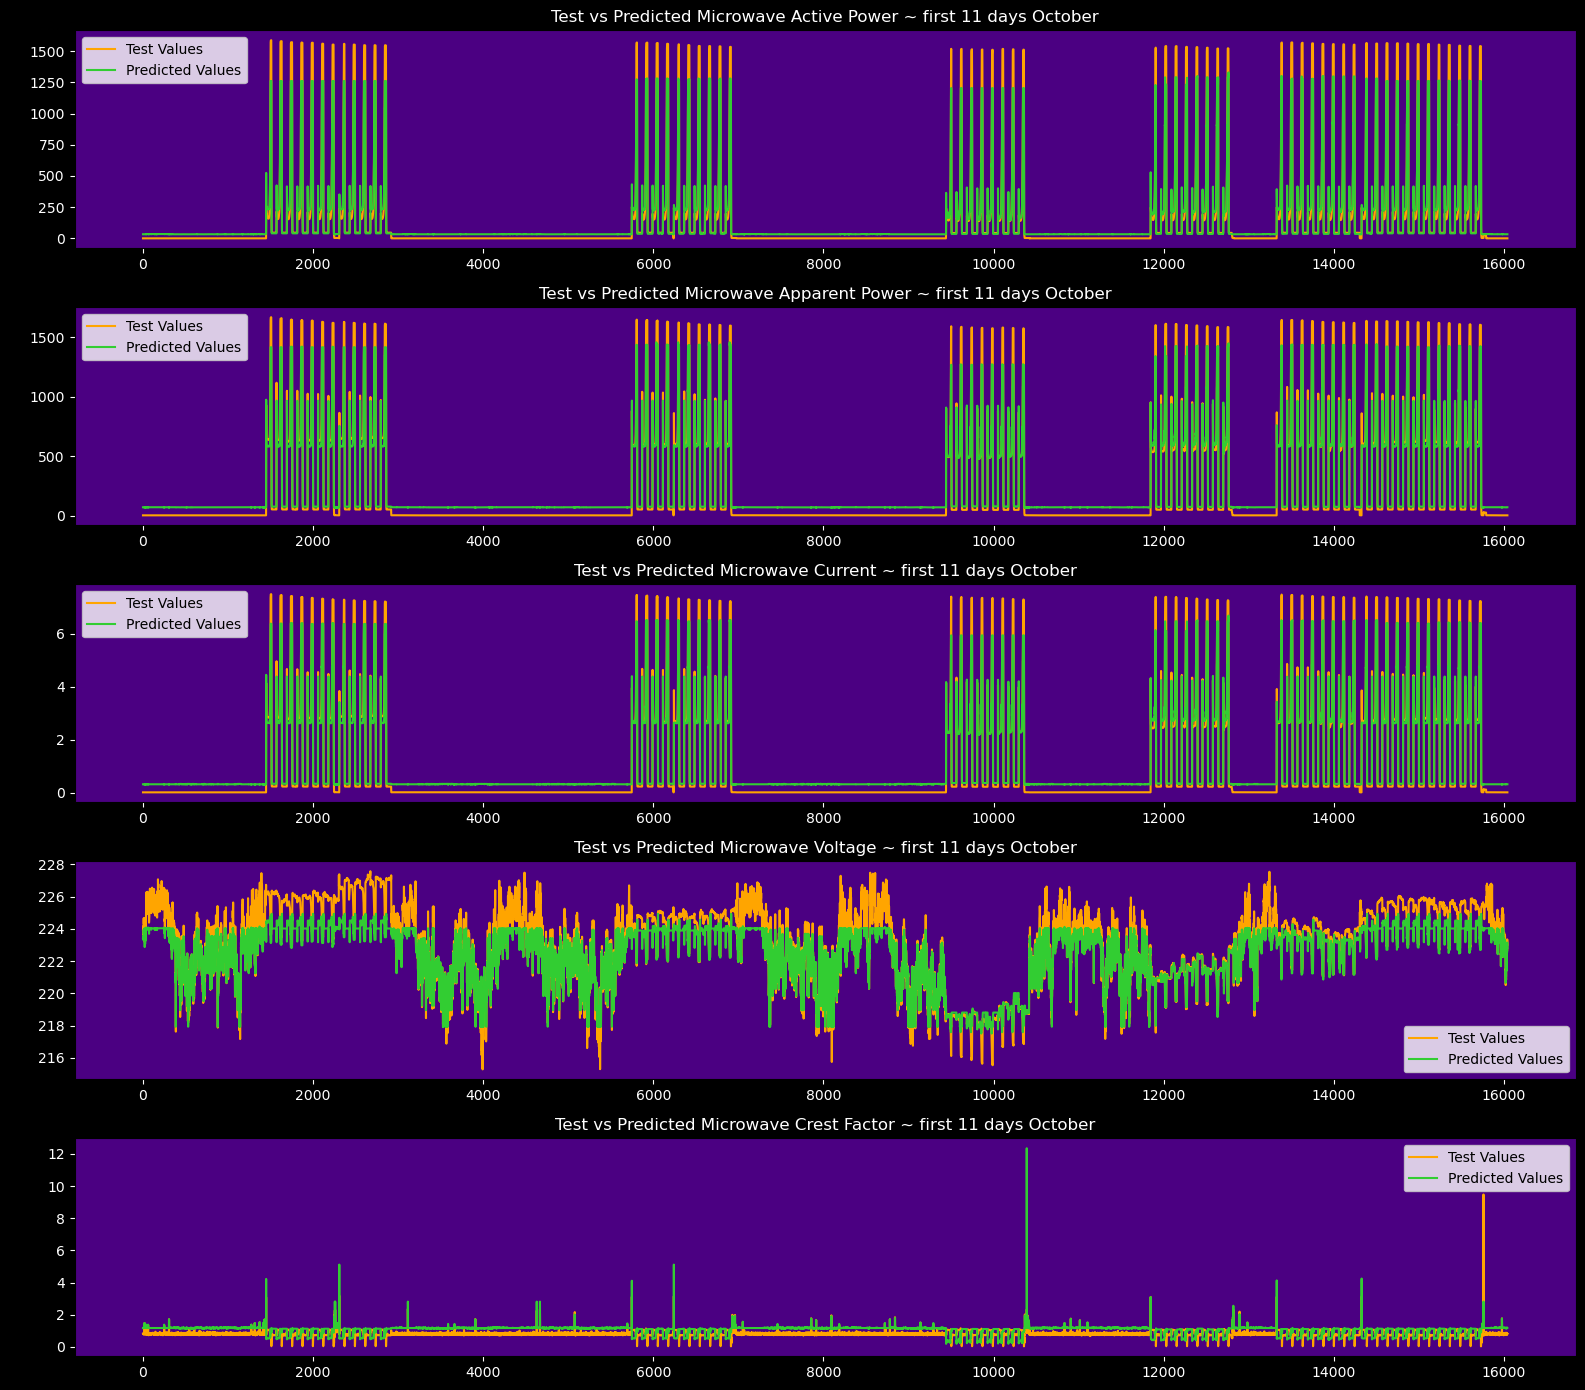

In [28]:
#first ~ 11 days
import matplotlib.pyplot as plt


predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Microwave Active Power ~ first 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Microwave Apparent Power ~ first 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Microwave Current ~ first 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Microwave Voltage ~ first 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Microwave Crest Factor ~ first 11 days October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


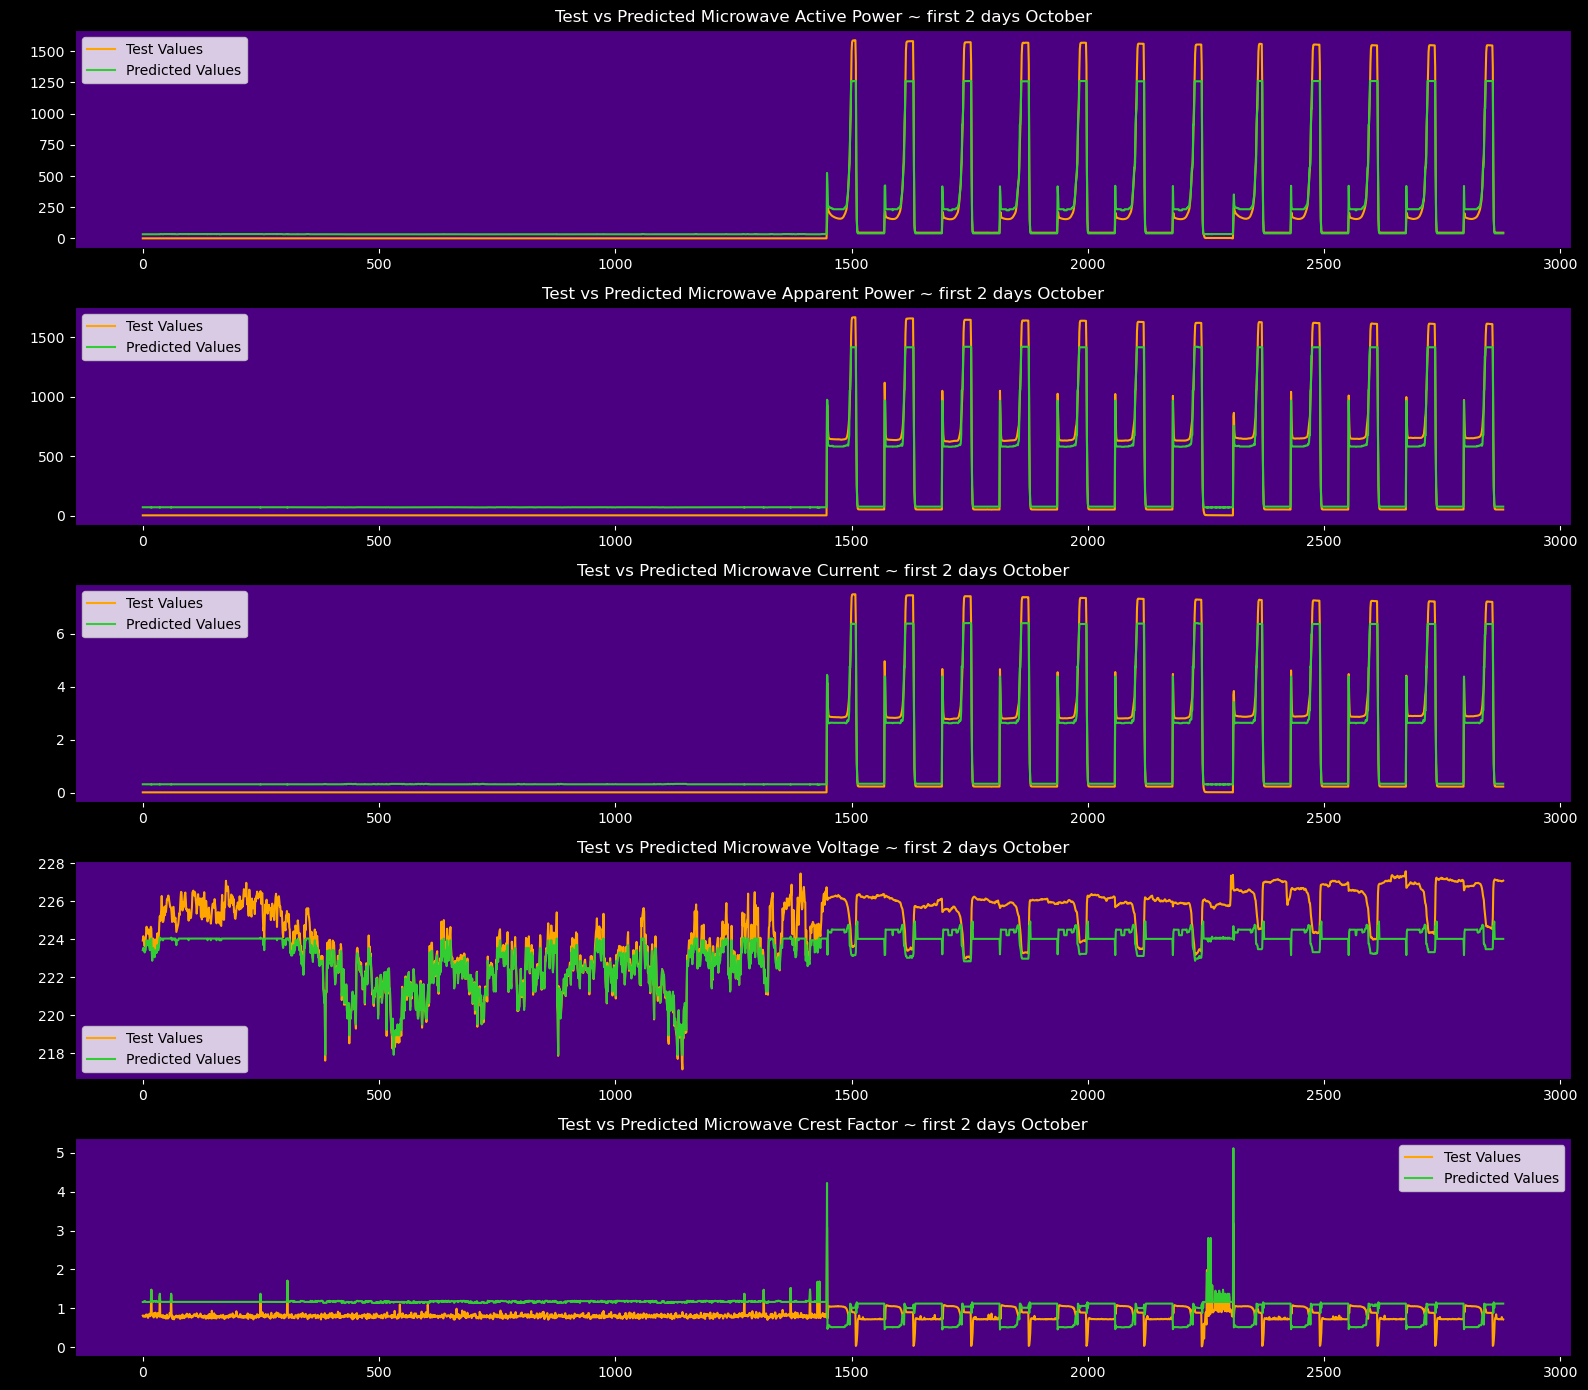

In [29]:
# first 2 days of data 


# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Microwave Active Power ~ first 2 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Microwave Apparent Power ~ first 2 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Microwave Current ~ first 2 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Microwave Voltage ~ first 2 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Microwave Crest Factor ~ first 2 days October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


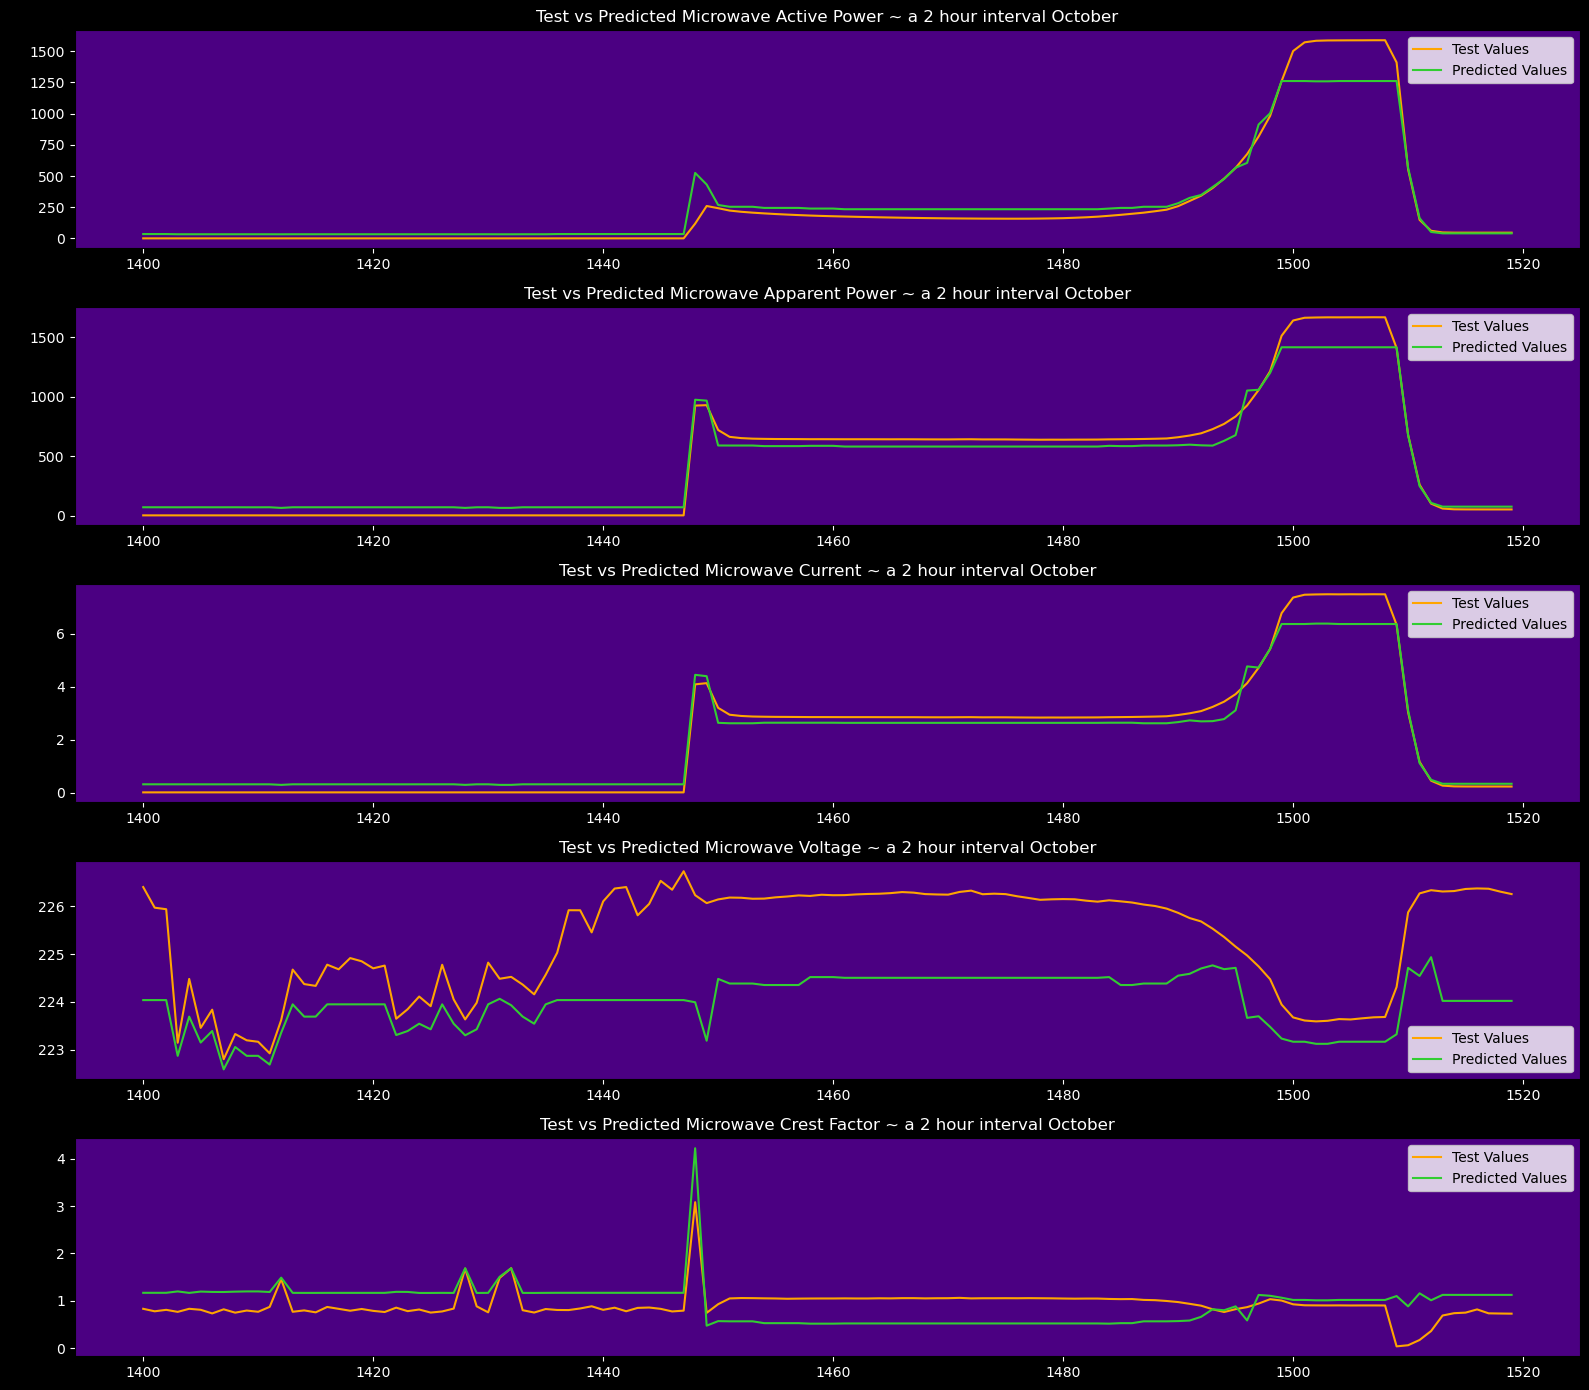

In [30]:
# for a 2 hour period will choose data points from 1400:1520

fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[1400:1520], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[1400:1520], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Microwave Active Power ~ a 2 hour interval October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[1400:1520], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[1400:1520], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Microwave Apparent Power ~ a 2 hour interval October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[1400:1520], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[1400:1520], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Microwave Current ~ a 2 hour interval October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[1400:1520], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[1400:1520], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Microwave Voltage ~ a 2 hour interval October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[1400:1520], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[1400:1520], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Microwave Crest Factor ~ a 2 hour interval October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [35]:


### DISHWASHER

from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the dishwasher device
input_cols_dishwasher = aggregated_train.columns
output_cols_dishwasher = dishwasher_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_dishwasher, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_dishwasher:
    # Create a new rf model with the corresponding label column
    rf = RandomForestRegressor(featuresCol='scaled_features', labelCol=output_col, numTrees= 60,maxDepth=25 )
    
    # Update the stages of the pipeline with the new rf model
    pipeline.setStages([assembler, scaler, rf])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on dishwasher_test dataset
    predictions = pipeline_model.transform(dishwasher_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 191.07460983963924
MSE: 36509.50652537036
MAE: 59.09753924161546
R2: 0.63871039390446



Metrics for apwrA:
RMSE: 202.571961192125
MSE: 41035.3994612238
MAE: 86.73800027481751
R2: 0.5985953626159034



Metrics for curA:
RMSE: 0.9294000060442087
MSE: 0.8637843712349751
MAE: 0.39902640193918504
R2: 0.6004046136162684



Metrics for vltA:
RMSE: 0.7384222437816363
MSE: 0.5452674101115064
MAE: 0.4456901909919582
R2: 0.8878063836223078



Metrics for screA:
RMSE: 0.6953182440260521
MSE: 0.4834674604754725
MAE: 0.4173935308111235
R2: -0.9857045653223189



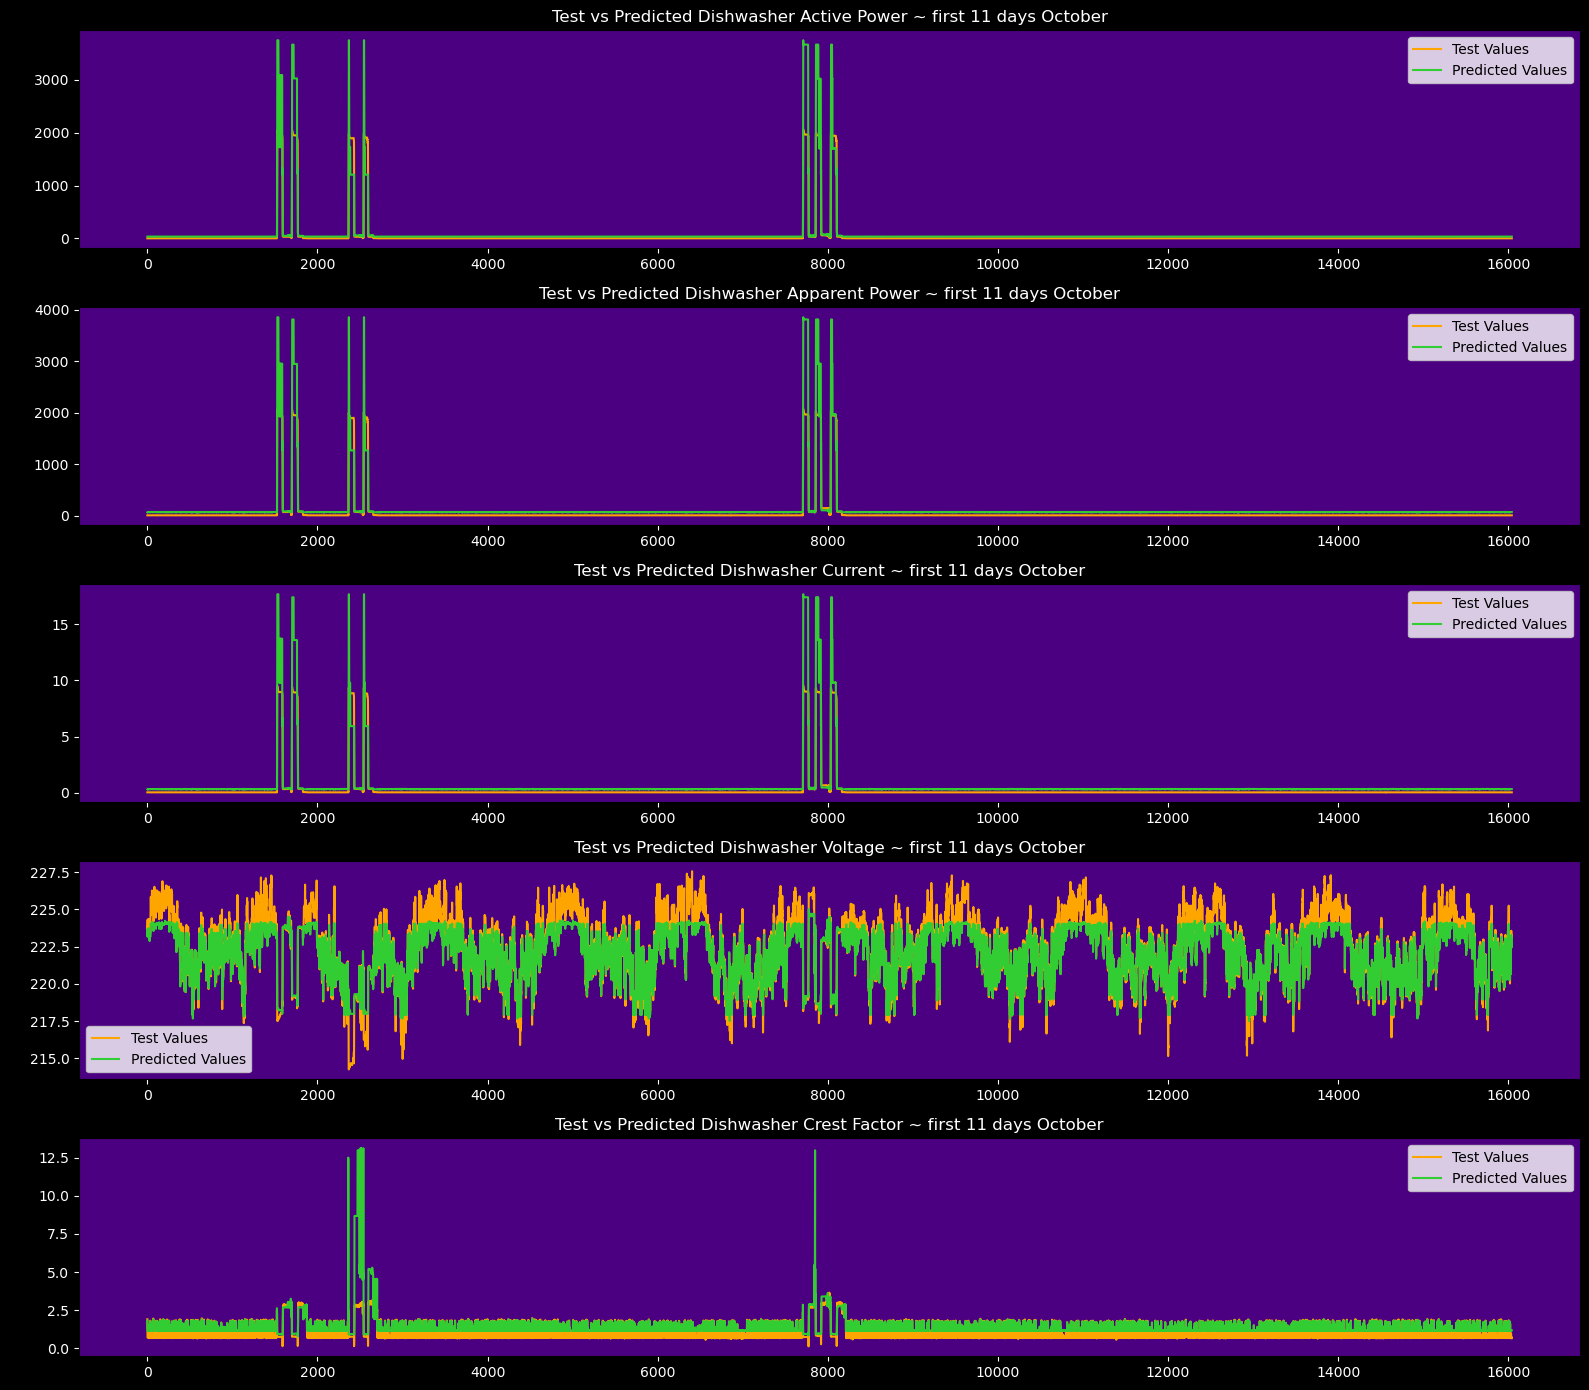

In [36]:
#first ~ 11 days
import matplotlib.pyplot as plt


predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Dishwasher Active Power ~ first 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Dishwasher Apparent Power ~ first 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Dishwasher Current ~ first 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Dishwasher Voltage ~ first 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Dishwasher Crest Factor ~ first 11 days October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


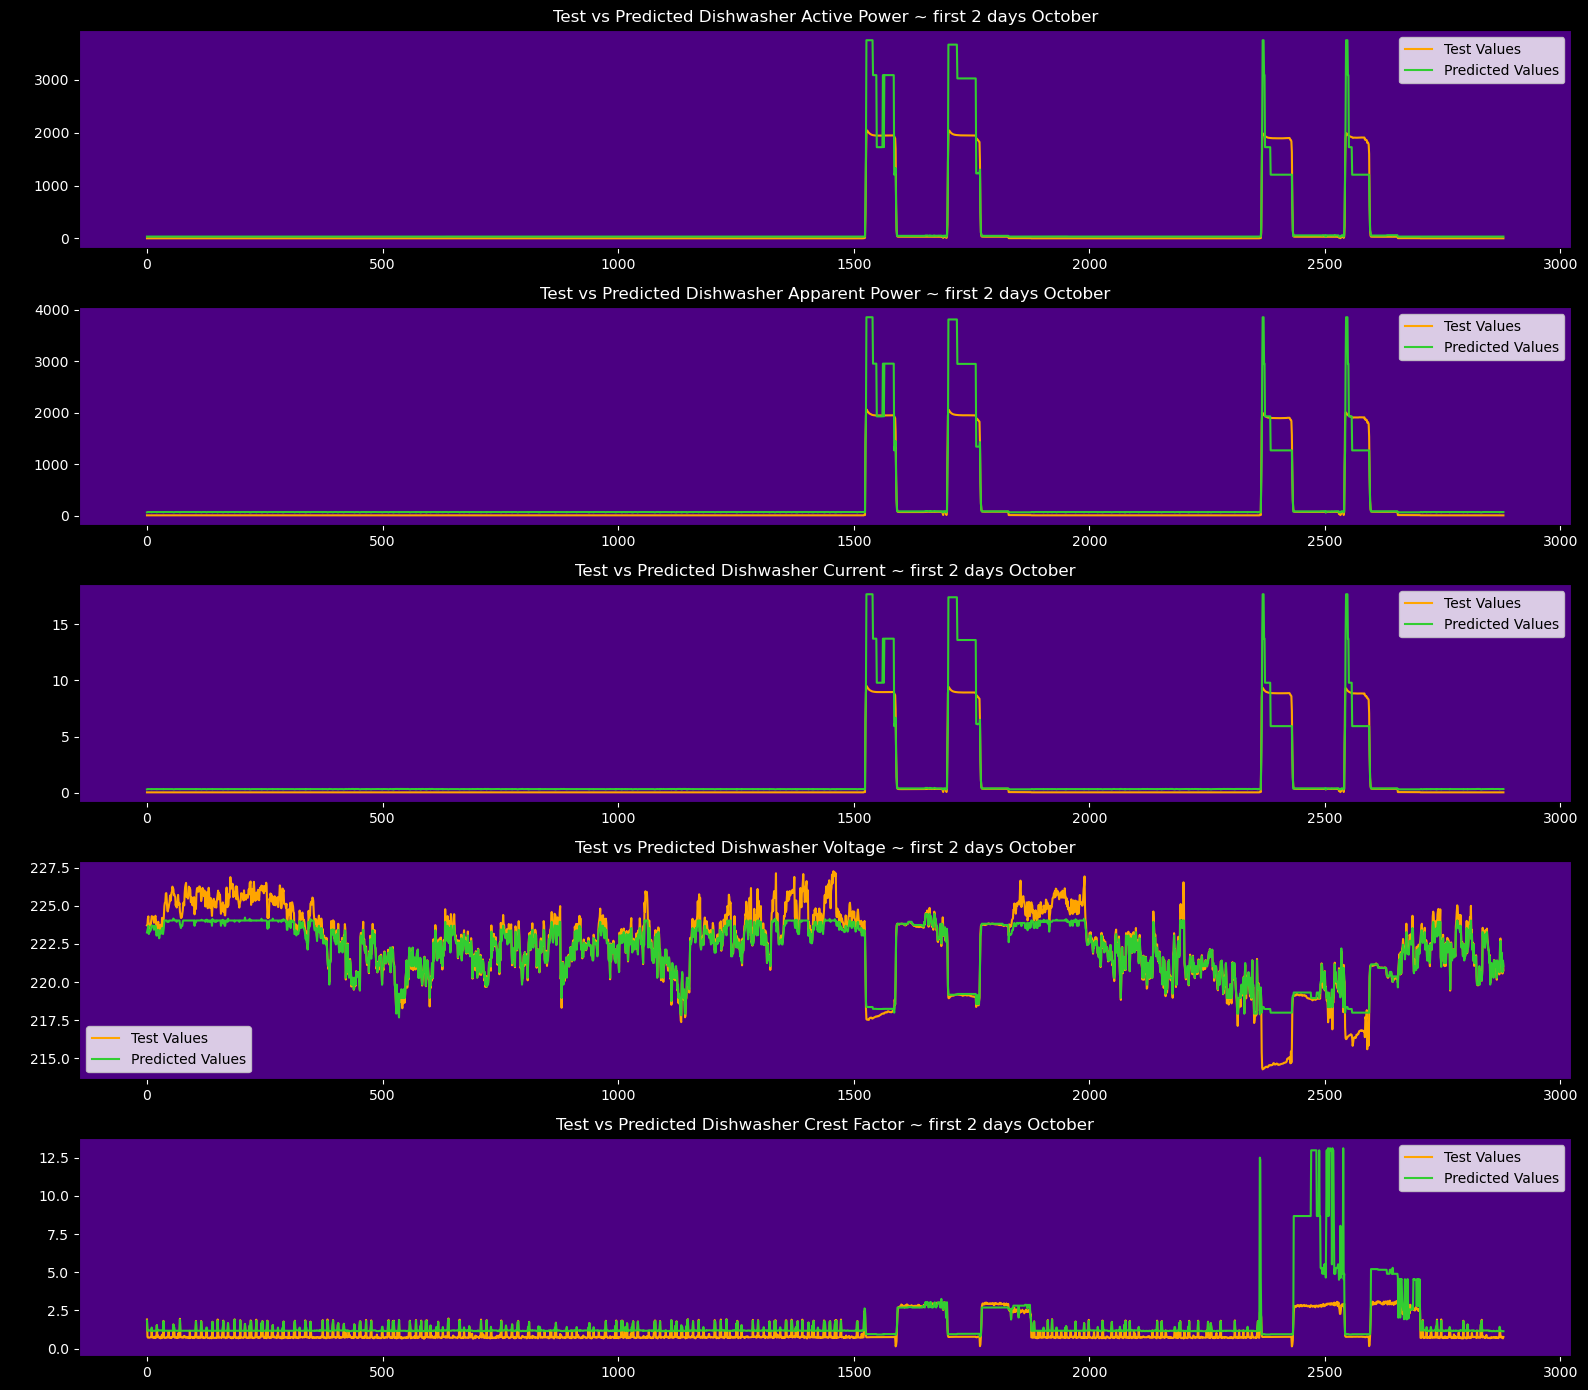

In [37]:
# first 2 days of October

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Dishwasher Active Power ~ first 2 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Dishwasher Apparent Power ~ first 2 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Dishwasher Current ~ first 2 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Dishwasher Voltage ~ first 2 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Dishwasher Crest Factor ~ first 2 days October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


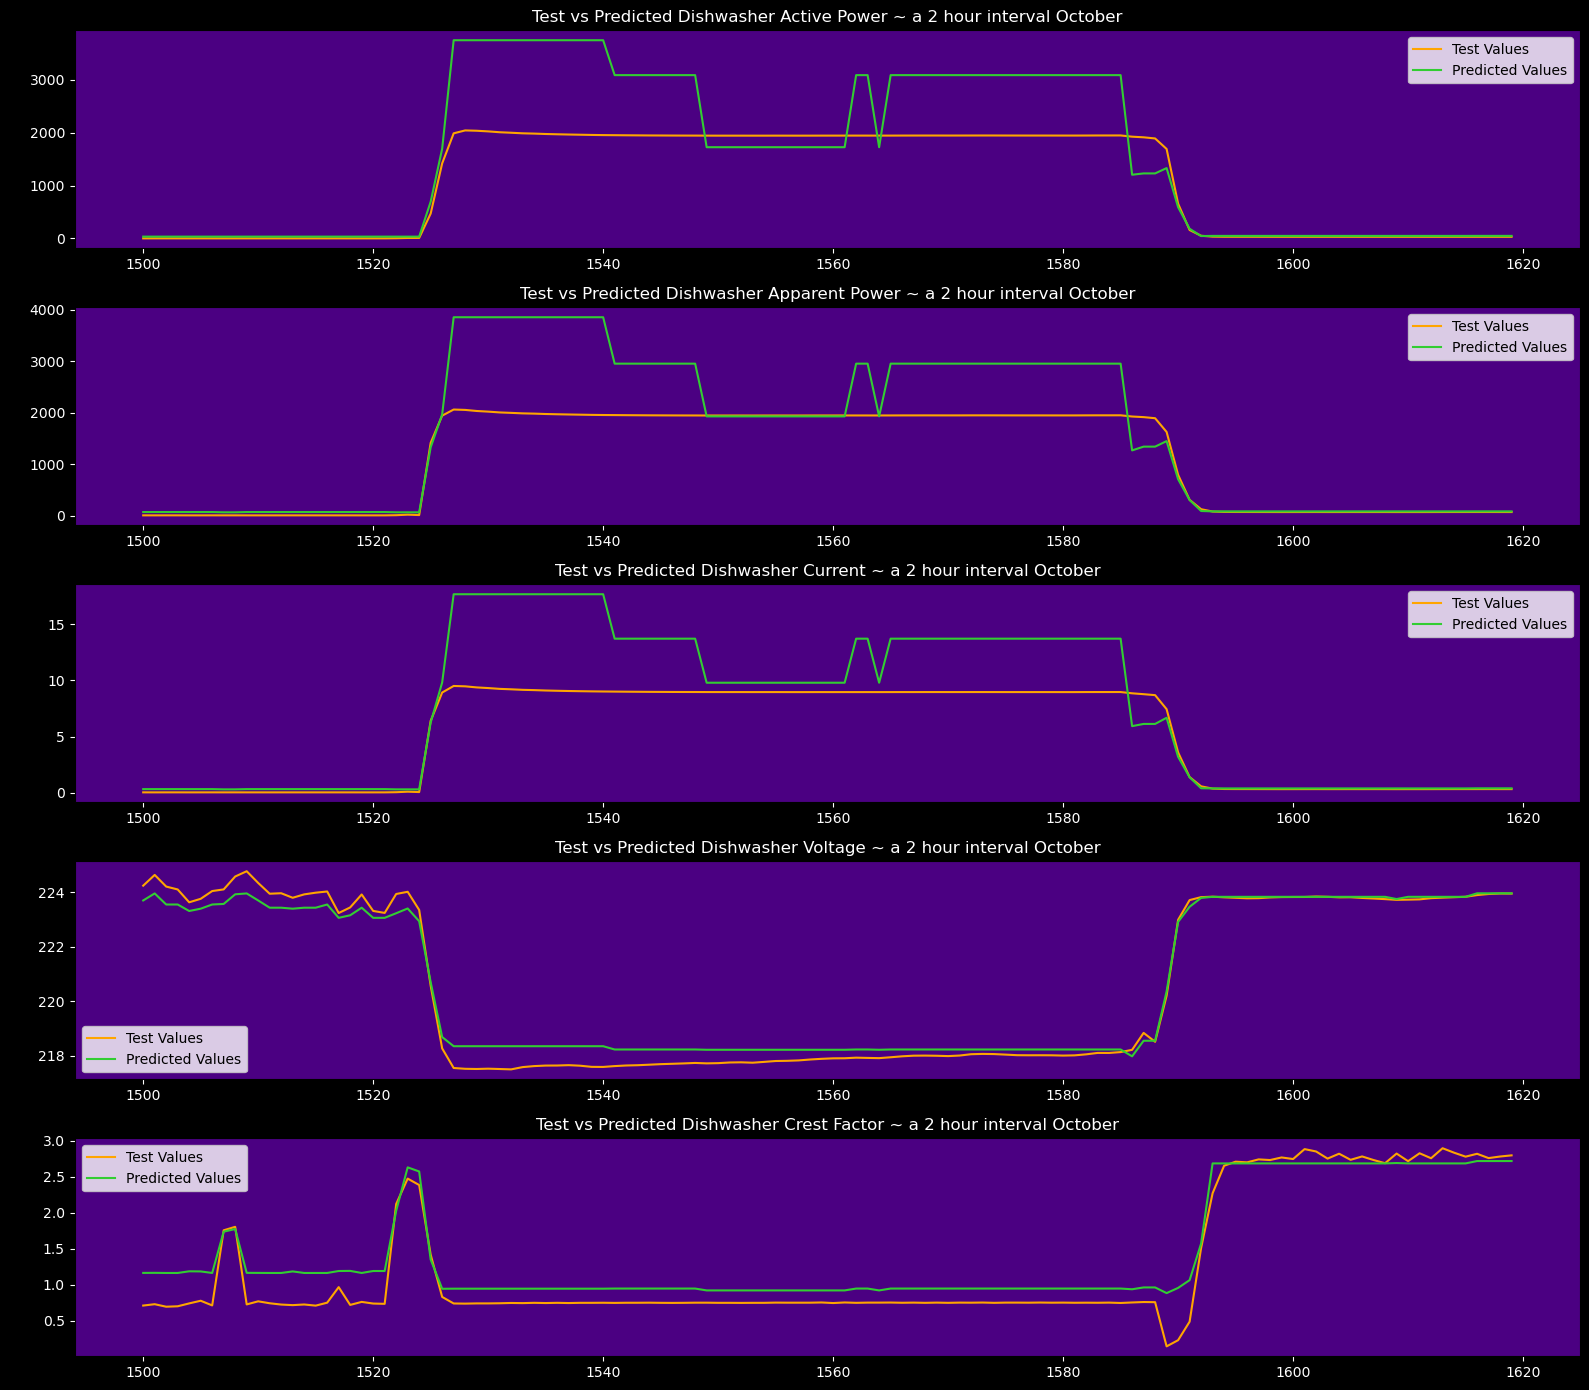

In [38]:
# and for the 2 hour interval we will choose data points 1500-1620

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[1500:1620], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[1500:1620], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Dishwasher Active Power ~ a 2 hour interval October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[1500:1620], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[1500:1620], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Dishwasher Apparent Power ~ a 2 hour interval October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[1500:1620], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[1500:1620], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Dishwasher Current ~ a 2 hour interval October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[1500:1620], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[1500:1620], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Dishwasher Voltage ~ a 2 hour interval October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[1500:1620], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[1500:1620], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Dishwasher Crest Factor ~ a 2 hour interval October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [39]:


### HOTPLATE

from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the hotplate device
input_cols_hotplate = aggregated_train.columns
output_cols_hotplate = hotplate_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_hotplate, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_hotplate:
    # Create a new rf model with the corresponding label column
    rf = RandomForestRegressor(featuresCol='scaled_features', labelCol=output_col, numTrees= 60,maxDepth=25 )
    
    # Update the stages of the pipeline with the new rf model
    pipeline.setStages([assembler, scaler, rf])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on hotplate_test dataset
    predictions = pipeline_model.transform(hotplate_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 40.030486179074735
MSE: 1602.4398237330934
MAE: 34.84414448928162
R2: 0.9587905237901497



Metrics for apwrA:
RMSE: 65.00250795057438
MSE: 4225.326039864486
MAE: 64.35378448151923
R2: 0.8927246611915959



Metrics for curA:
RMSE: 0.2931684023719756
MSE: 0.08594771214933658
MAE: 0.29024152562658195
R2: 0.8933974675418439



Metrics for vltA:
RMSE: 0.7314560993823835
MSE: 0.5350280253236914
MAE: 0.44699245486796796
R2: 0.8764257440503541



Metrics for screA:
RMSE: 0.09739951874362253
MSE: 0.009486666251489277
MAE: 0.05847101779120195
R2: 0.5976444227275732



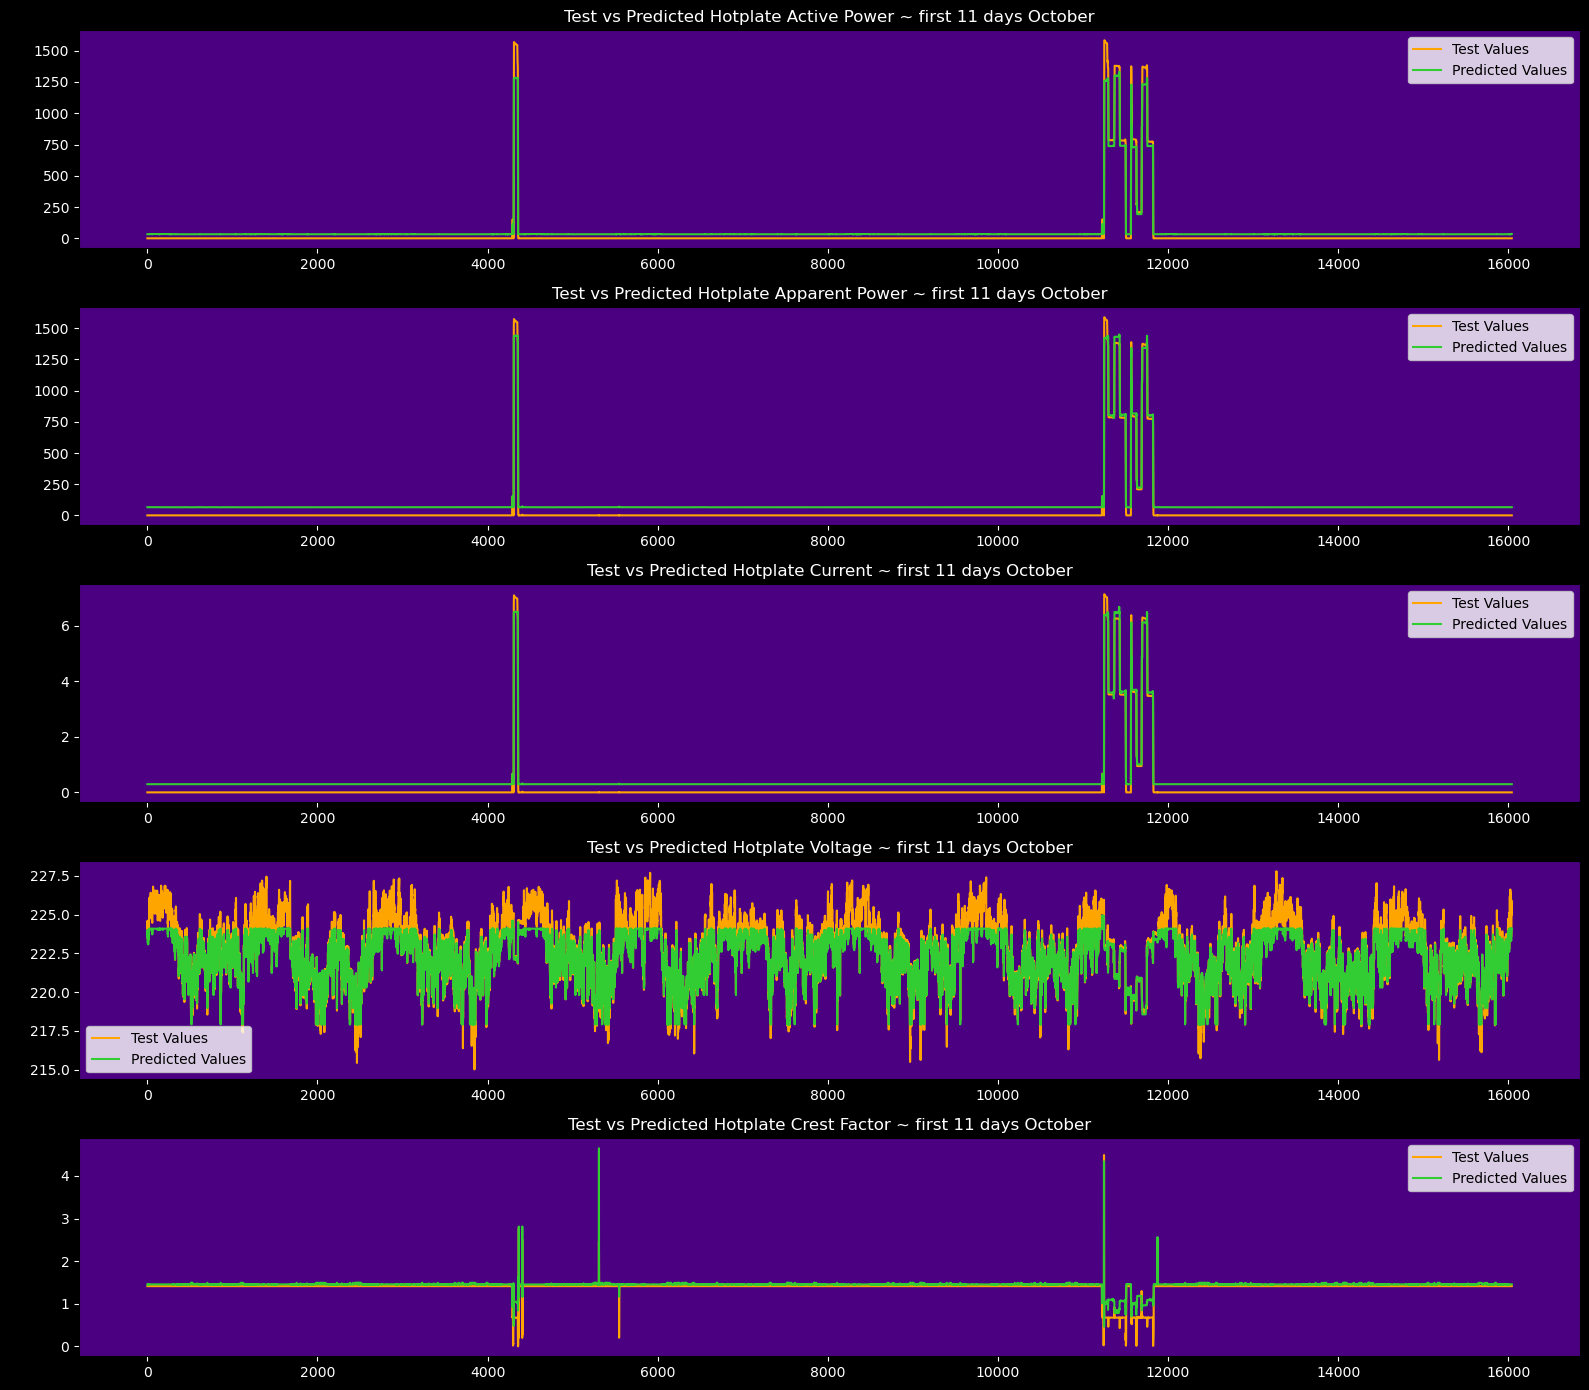

In [40]:
#first ~ 11 days
import matplotlib.pyplot as plt


predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Hotplate Active Power ~ first 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Hotplate Apparent Power ~ first 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Hotplate Current ~ first 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Hotplate Voltage ~ first 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Hotplate Crest Factor ~ first 11 days October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


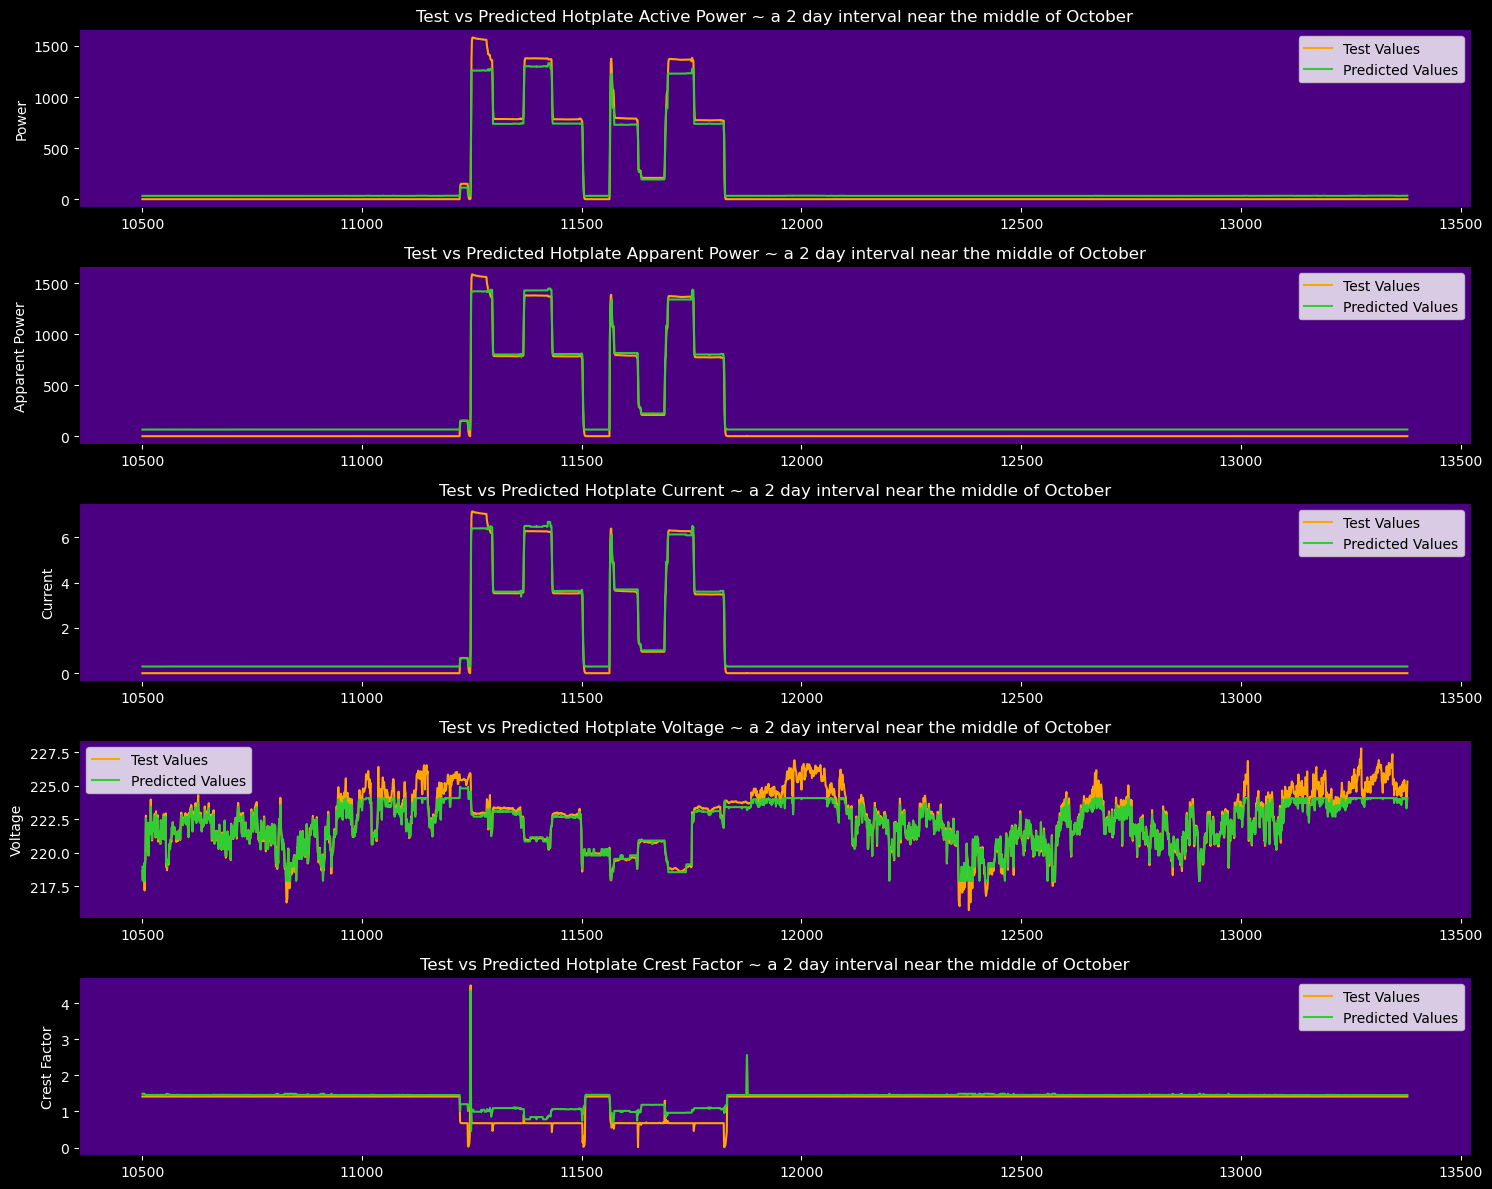

In [42]:
 #since we can see that there is not much "action" in the first two days regarding mainly the active power
# we will zoom in to a 2 day interval at about 10500 to 13380 where multiple changes in active power occur
# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[10500:13380], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[10500:13380], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Hotplate Active Power ~ a 2 day interval near the middle of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[10500:13380], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[10500:13380], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Hotplate Apparent Power ~ a 2 day interval near the middle of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[10500:13380], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[10500:13380], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Hotplate Current ~ a 2 day interval near the middle of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[10500:13380], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[10500:13380], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Hotplate Voltage ~ a 2 day interval near the middle of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[10500:13380], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[10500:13380], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Hotplate Crest Factor ~ a 2 day interval near the middle of October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()



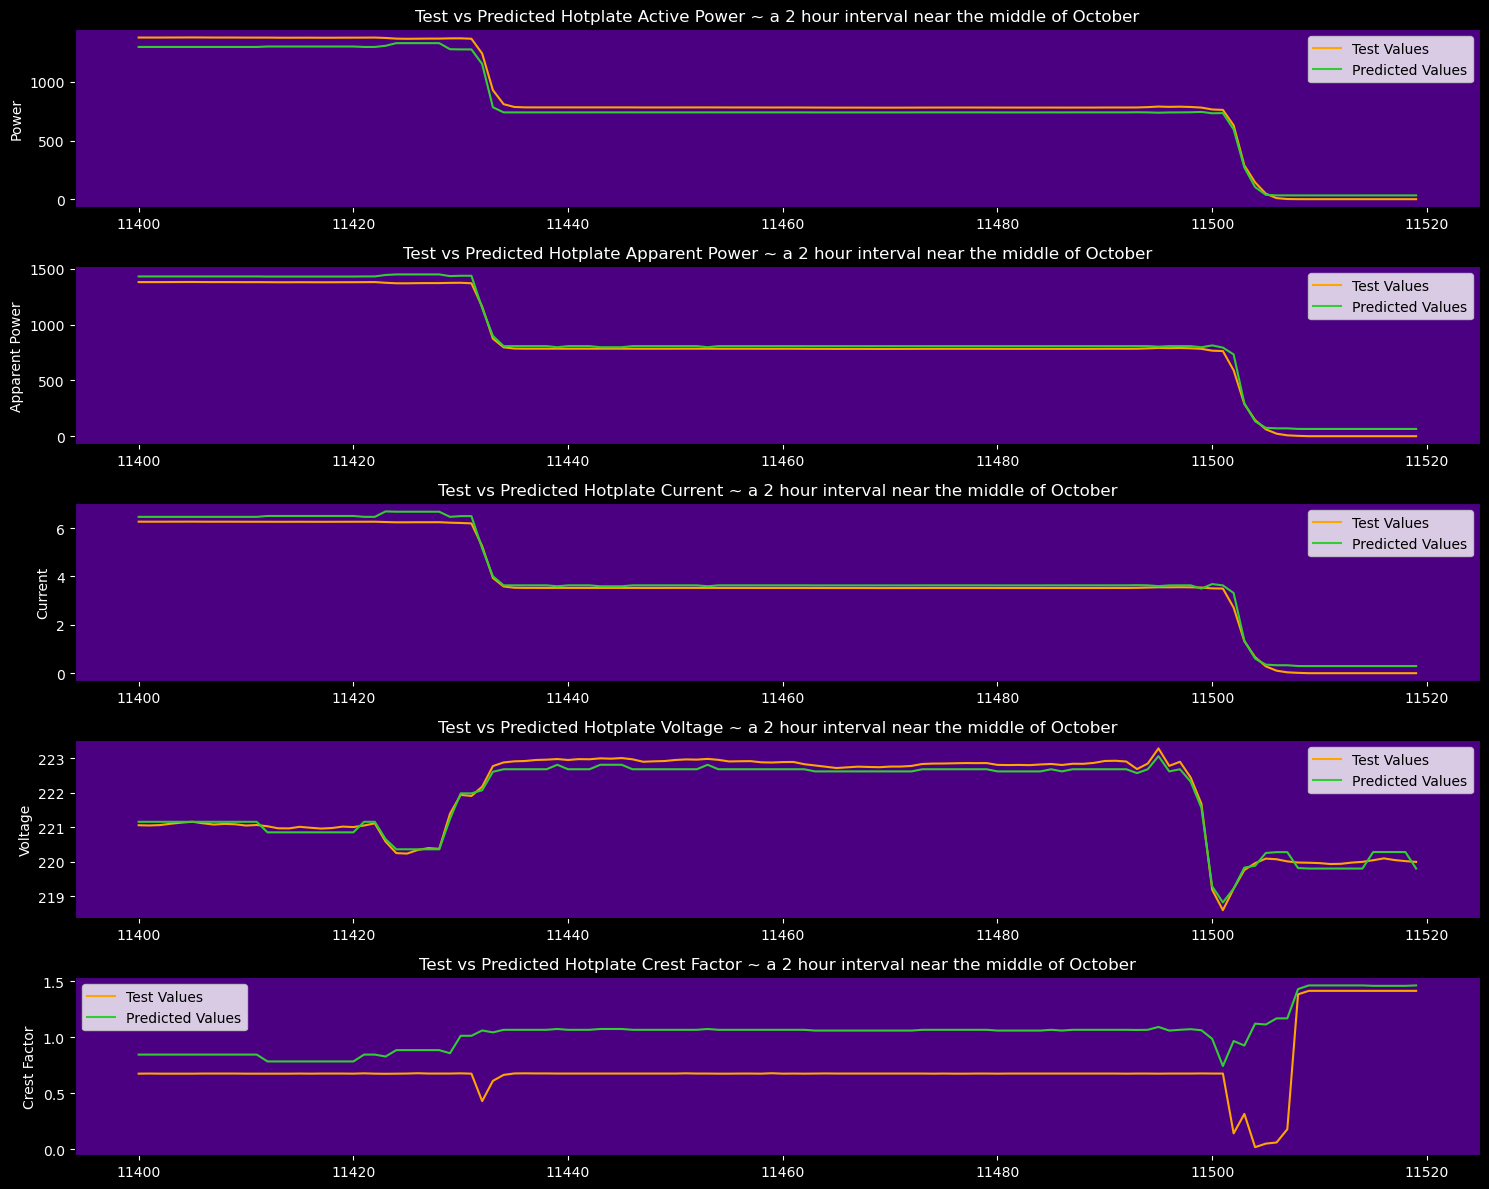

In [43]:
# 2 hour interval 11400 to 11520

fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[11400:11520], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[11400:11520], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Hotplate Active Power ~ a 2 hour interval near the middle of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[11400:11520], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[11400:11520], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Hotplate Apparent Power ~ a 2 hour interval near the middle of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[11400:11520], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[11400:11520], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Hotplate Current ~ a 2 hour interval near the middle of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[11400:11520], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[11400:11520], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Hotplate Voltage ~ a 2 hour interval near the middle of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[11400:11520], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[11400:11520], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Hotplate Crest Factor ~ a 2 hour interval near the middle of October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()



In [45]:


### Water Heater
 # water heater (different phase of dcolection)
# since the data were collected in phase c not A we need to rename the collumns first
water_heater_train = water_heater_train.toDF('pwrA','apwrA','curA','vltA','screA')
water_heater_test = water_heater_test.toDF('pwrA','apwrA','curA','vltA','screA')
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the water_heater device
input_cols_water_heater = aggregated_train.columns
output_cols_water_heater = water_heater_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_water_heater, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_water_heater:
    # Create a new rf model with the corresponding label column
    rf = RandomForestRegressor(featuresCol='scaled_features', labelCol=output_col, numTrees= 60,maxDepth=25 )
    
    # Update the stages of the pipeline with the new rf model
    pipeline.setStages([assembler, scaler, rf])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on water_heater_test dataset
    predictions = pipeline_model.transform(water_heater_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']


Metrics for pwrA:
RMSE: 32.840322317921185
MSE: 1078.4867699449521
MAE: 32.83919525309844
R2: -22203.38288661797



Metrics for apwrA:
RMSE: 57.17350807256616
MSE: 3268.8100253237876
MAE: 57.17290141699267
R2: -168471.0928361859



Metrics for curA:
RMSE: 0.25993146191820005
MSE: 0.06756436489493269
MAE: 0.2599181756165424
R2: -178930.4718236359



Metrics for vltA:
RMSE: 1.4678771654430478
MSE: 2.1546633728291167
MAE: 1.1690050087119055
R2: 0.34954282799143455



Metrics for screA:
RMSE: 0.8730050353141731
MSE: 0.7621377916839005
MAE: 0.35967927745012507
R2: -2.22953537716228



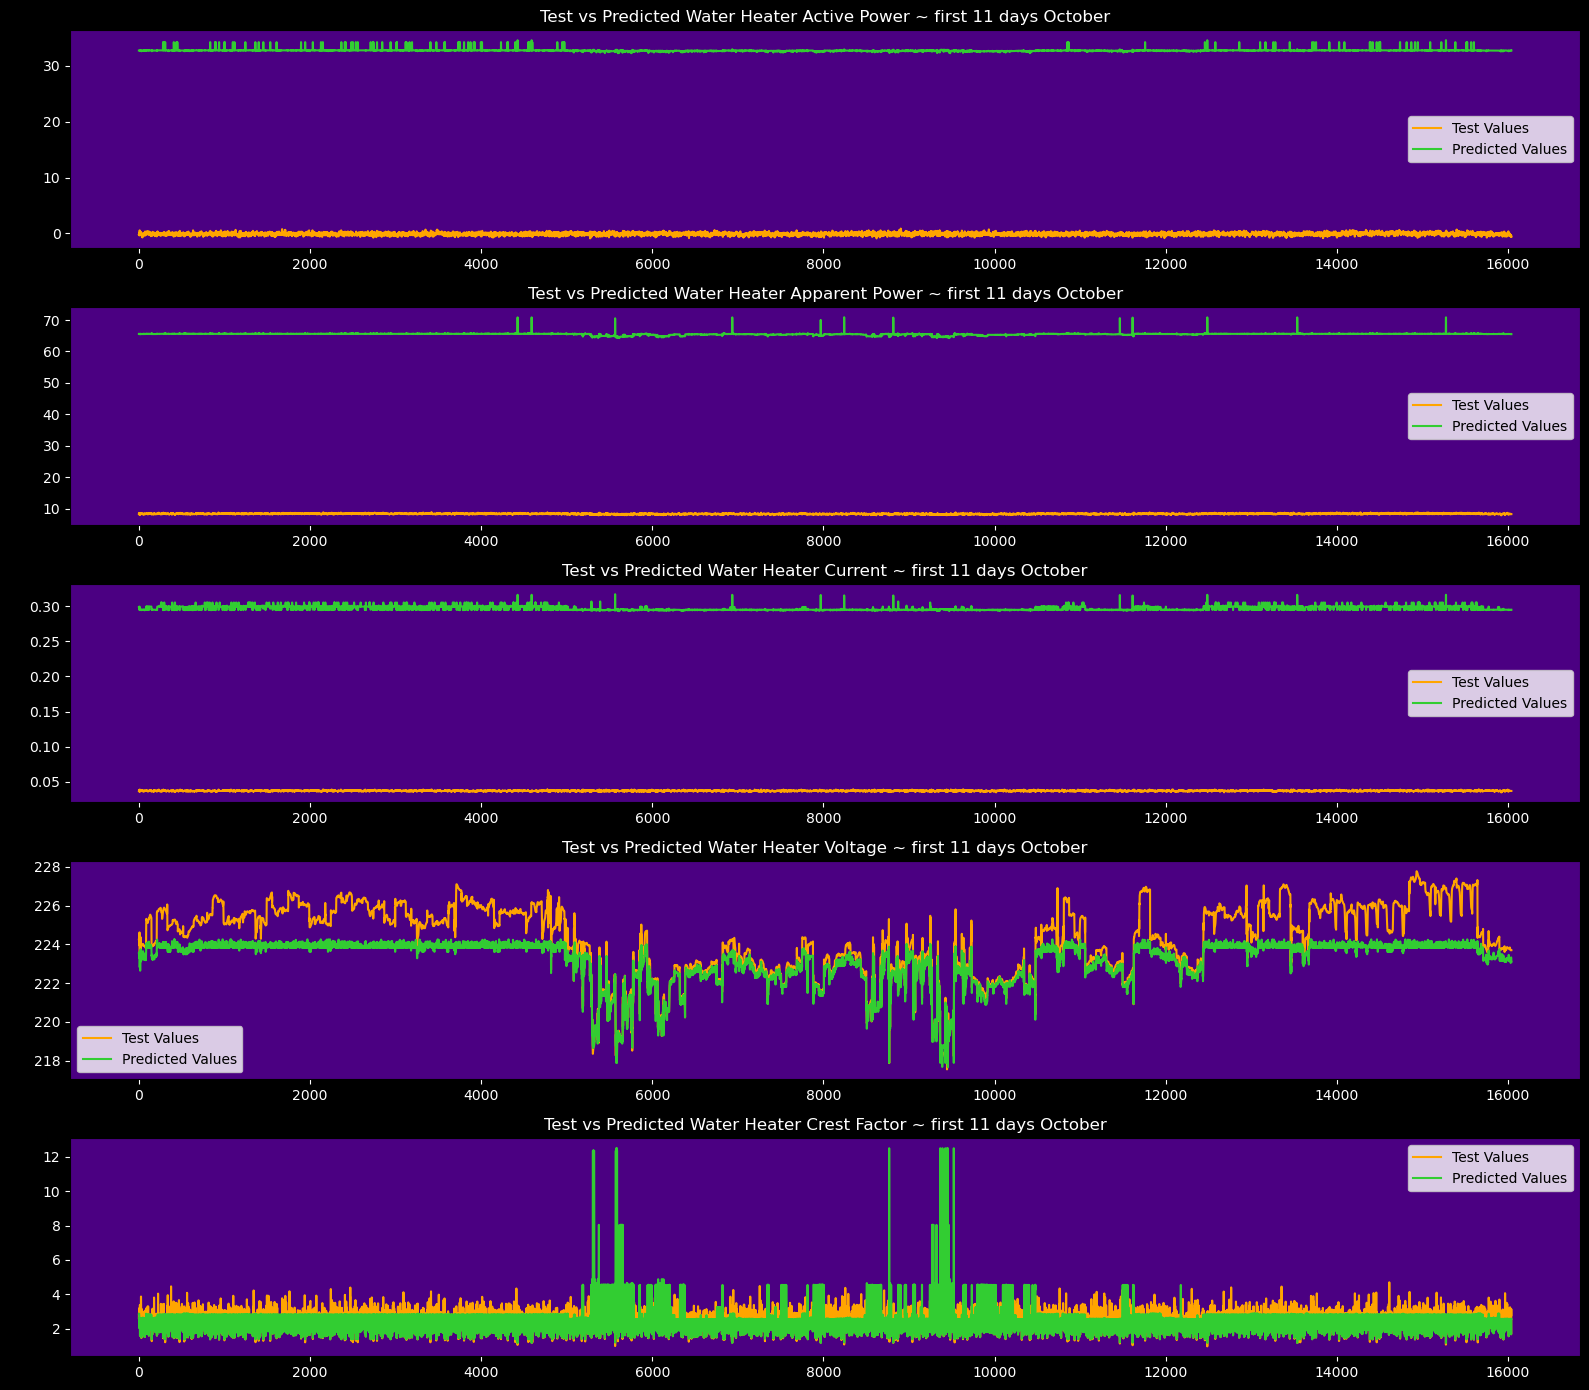

In [46]:
#first ~ 11 days
import matplotlib.pyplot as plt


predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_pwrA  = predicted_values_pwrA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()

# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))

fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power')
axs[0].set_title('Test vs Predicted Water Heater Active Power ~ first 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power')
axs[1].set_title('Test vs Predicted Water Heater Apparent Power ~ first 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current')
axs[2].set_title('Test vs Predicted Water Heater Current ~ first 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage')
axs[3].set_title('Test vs Predicted Water Heater Voltage ~ first 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor')
axs[4].set_title('Test vs Predicted Water Heater Crest Factor ~ first 11 days October',color = 'white')
axs[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


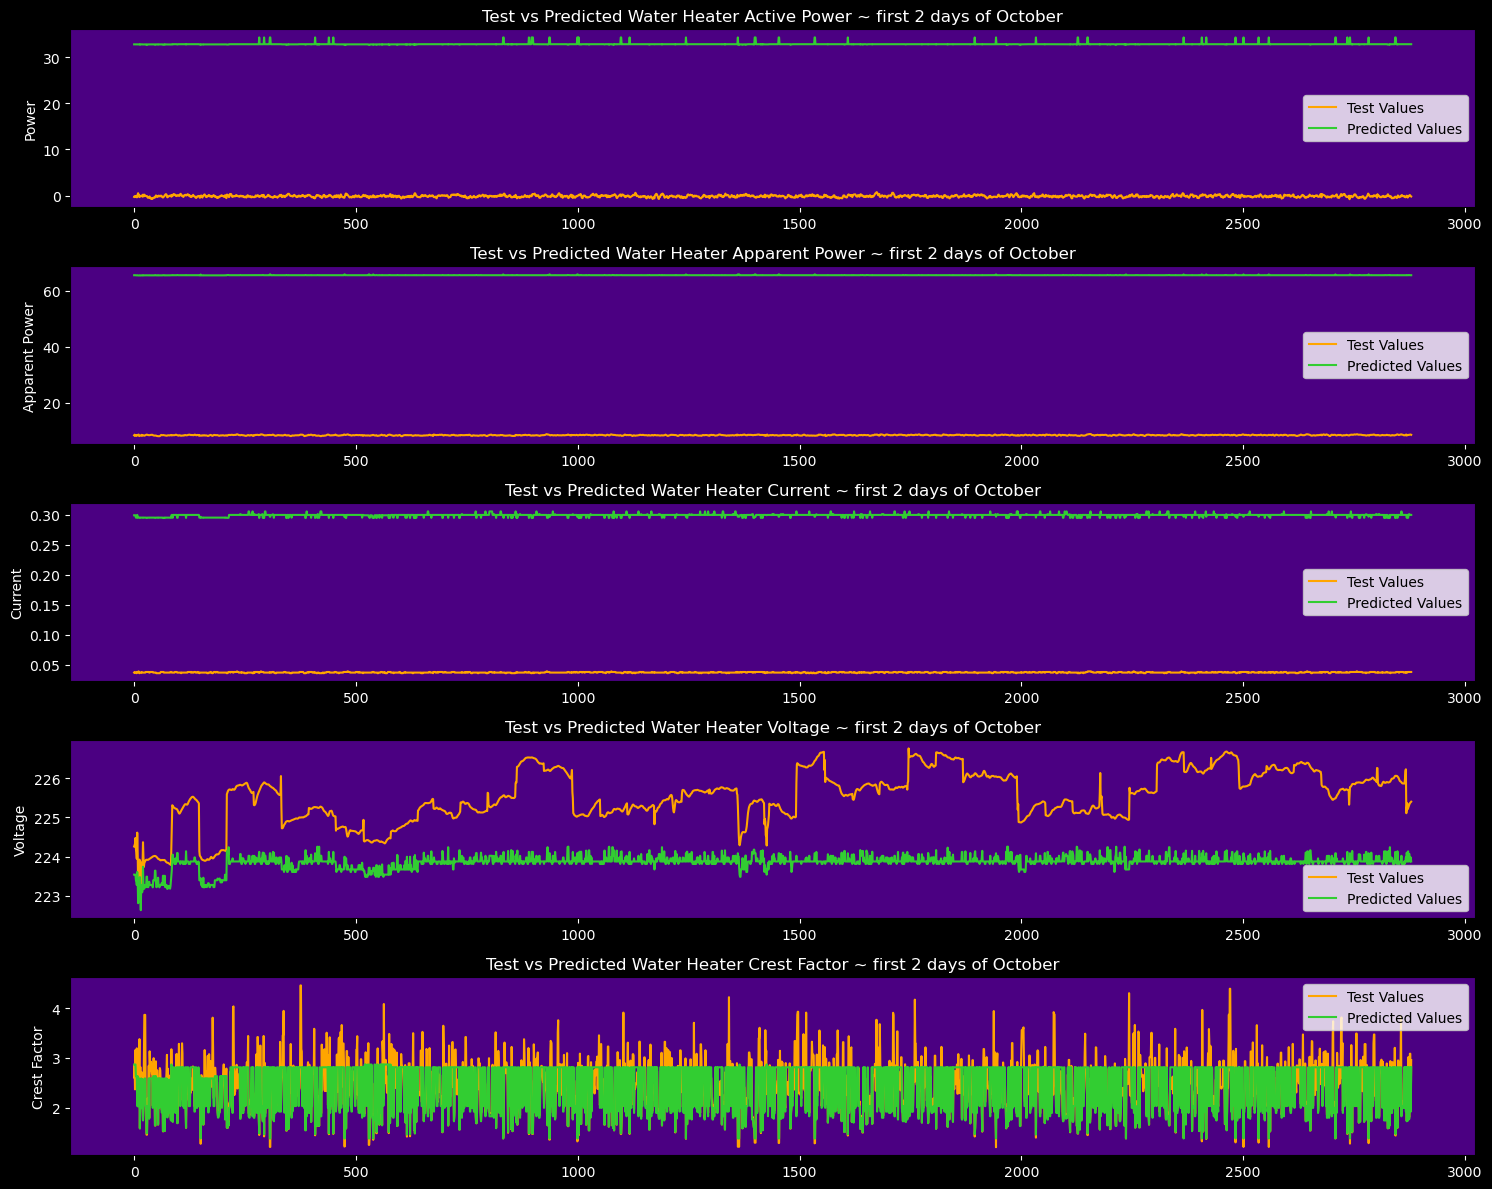

In [47]:
# the different phase collection shows here probably since it is the only appliance that active and apparent power seem way off,
# although a water heater has low energy consumption metrics and could be indistinguishable from the aggregated signal. Voltage
# and Crest factor seem fine though
# let's zoom in the first 2 days of October

import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Water Heater Active Power ~ first 2 days of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Water Heater Apparent Power ~ first 2 days of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Water Heater Current ~ first 2 days of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Water Heater Voltage ~ first 2 days of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Water Heater Crest Factor ~ first 2 days of October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


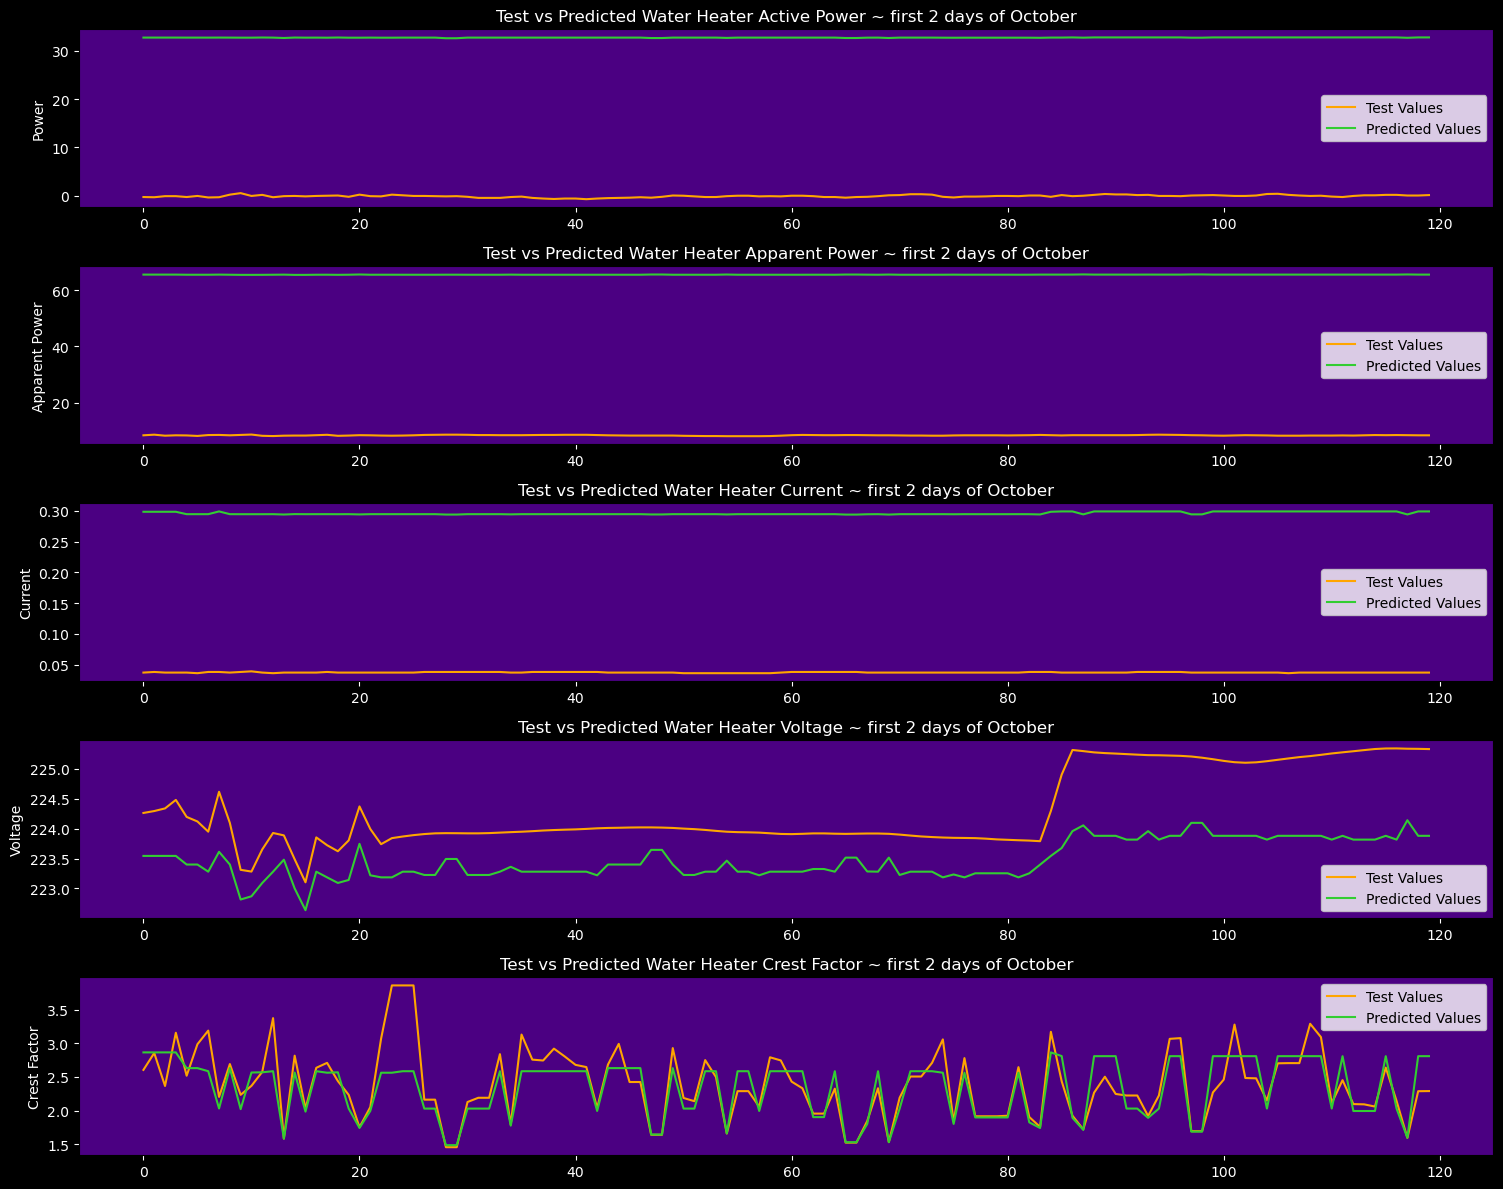

In [48]:
# and the first two hours as a 2 hour interval

import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:120], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:120], label='Predicted Values', color='limegreen')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Water Heater Active Power ~ first 2 days of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:120], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:120], label='Predicted Values', color='limegreen')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Water Heater Apparent Power ~ first 2 days of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:120], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:120], label='Predicted Values', color='limegreen')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Water Heater Current ~ first 2 days of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:120], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:120], label='Predicted Values', color='limegreen')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Water Heater Voltage ~ first 2 days of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:120], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:120], label='Predicted Values', color='limegreen')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Water Heater Crest Factor ~ first 2 days of October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()
